# Entre Opiniones y Vuelos: Explorando la Satisfacción de los Pasajeros con Invistico Airlines

![5-star reviews icon](https://resource.gsx.com/5-star-reviews-icon.png)

### <span style="color:gray">**ÍNDICE**</span>

1) Abstract
2) La Satisfacción del Cliente en la Industria Aérea
3) Invistico Airlines 
    1. Situación actual 
    2. Loyalty and Satisfaction
    3. "Business or Pleasure"
    4. Factores en la Experiencia Aérea
    5. Tiempos de Vuelo y Retrasos
4) Prediciendo la satisfacción del cliente 
    1. Encoding
    2. Feature Engineering
    3. Algorithm selection
        1. Modelo 1 - Regresión Logística
            1. Train / Test
            2. Entrenamiento del modelo - Conjunto TRAIN
            3. Métricas de rendimiento: matriz de confusión y métricas derivadas, y curva ROC
            4. Cross Validation: K-fold
        2. Modelo 2 - Random Forest
            1. Train / Test
            2. Entrenamiento del modelo - Conjunto TRAIN
            3. Métricas de rendimiento: matriz de confusión y métricas derivadas, y curva ROC
            4. Cross Validation: K-fold
        3. PCA
    4. Conclusiones y elección del modelo
5) Conclusiones y Next Steps

### <span style="color:gray">**1. Abstract**</span>

Este proyecto de ciencia de datos se centra en mejorar la satisfacción del cliente en Invistico Airlines, una aerolínea que enfrenta desafíos significativos con un índice de satisfacción del 55%, considerablemente por debajo del objetivo del 70%. Inspirado en las tendencias y desafíos generales de la industria aérea, abordamos áreas clave, como la relación entre lealtad y satisfacción, la influencia de las clases de viaje, la importancia de servicios online y del aeropuerto, y los impactos de los tiempos de vuelo y retrasos. A través de técnicas de machine learning, buscamos anticipar las preferencias de los clientes y proponemos estrategias específicas, como la mejora de clases de viaje con niveles bajos de satisfacción y la focalización en servicios online y del aeropuerto. Al alinear estas acciones con las tendencias de la industria, aspiramos a elevar la satisfacción del cliente en Invistico Airlines y contribuir a la mejora general de la experiencia del usuario en la industria aérea.

### <span style="color:gray">**2. La Satisfacción del Cliente en la Industria Aérea**</span>
En el dinámico panorama de la industria aérea, la satisfacción del cliente se ha convertido en un elemento crucial para el éxito y la reputación de las aerolíneas. Recientemente, Aerolíneas Argentinas ha experimentado mejoras notables en su índice de satisfacción, implementando estrategias innovadoras y mejoras en sus servicios para ofrecer experiencias más gratificantes a sus pasajeros. A nivel global, diversas fuentes, como estudios de J.D. Power y análisis académicos, arrojan luz sobre las tendencias y prácticas exitosas que influyen en la percepción de los clientes hacia las aerolíneas. La implementación de buenas prácticas en la experiencia del cliente, el diseño de servicios impactante y la atención a las preferencias emergentes de los pasajeros son elementos clave que han cobrado relevancia. A través de una visión integrada de múltiples fuentes, incluida una infografía detallada, se revela un panorama completo sobre la satisfacción de los pasajeros y las estrategias que las aerolíneas están adoptando para alcanzar nuevos niveles de excelencia en el servicio al cliente.

La industria aérea enfrenta una serie de desafíos críticos que están impactando directamente en la satisfacción de los clientes. En primer lugar, los elevados costos y tarifas asociados con los servicios aéreos han emergido como la principal preocupación, generando una disminución significativa en la satisfacción general. La presión económica se intensifica, particularmente en segmentos como economy/basic economy, donde los viajeros experimentan una notoria disminución en la satisfacción, especialmente en lo relacionado con los costos y tarifas adicionales. Esta disparidad se acentúa al observar las diferentes clases de viaje, donde los viajeros de primera/business reportan niveles más altos de satisfacción en comparación con aquellos en clase económica.

Además, los problemas operativos, como retrasos de vuelos, pérdida de equipaje y restricciones en la disponibilidad de vuelos, añaden una capa adicional de complejidad a la experiencia del cliente. Mientras la industria se esfuerza por mejorar la eficiencia operativa, las condiciones de vuelo, incluida la incomodidad de los asientos y la calidad del servicio, también se han destacado como áreas de preocupación que requieren atención. Estos desafíos, combinados con el impacto de factores externos como el aumento en los precios del combustible y los costos de seguridad, subrayan la necesidad urgente de estrategias específicas y mejoras para abordar los problemas de satisfacción del cliente en la industria aérea.

### <span style="color:gray">**3. Invistico Airlines**</span>
El objetivo principal de este proyecto de ciencia de datos es buscar soluciones para mejorar la satisfacción del cliente de una aerolínea mediante el análisis detallado de diversos factores. 
Utilizando técnicas de machine learning, se busca predecir la satisfacción del cliente a través de datos históricos. La meta final es implementar estrategias y cambios específicos en áreas clave, anticipándose a posibles problemas y elevando la satisfacción del cliente a niveles deseados. Este enfoque personalizado, considerando segmentaciones por género, edad, tipo de viaje, clase de vuelo, entre otros, busca garantizar una comprensión profunda de las necesidades y expectativas de los clientes, permitiendo una mejora continua en la experiencia del usuario

La información fue suministrada por una aerolínea que, por diversos motivos, el nombre real de la empresa no se revela, adoptando en su lugar el nombre ficticio de Invistico Airlines.
La base de datos comprende información detallada de clientes que ya han experimentado sus servicios y se han recopilado opiniones de estos, junto con sus datos de vuelo.

El propósito principal de este conjunto de datos es anticipar si un cliente futuro expresaría satisfacción con los servicios, basándose en los detalles de otros parámetros. Adicionalmente, las aerolíneas buscan identificar las áreas específicas de sus servicios que requieren mayor énfasis para cultivar la satisfacción del cliente.

El desafío principal que enfrenta este proyecto reside en la insatisfacción de los usuarios de la aerolínea, evidenciada por un índice de satisfacción del 55%, que se encuentra significativamente por debajo del objetivo establecido del 70%. La tarea fundamental consiste en comprender y abordar las razones detrás de esta disparidad, con el objetivo de implementar estrategias efectivas que eleven el nivel de satisfacción de los usuarios al umbral deseado, respondiendo a la pregunta: ¿cómo aumentar el índice de satisfacción actual de los usuarios de la aerolínea para cumplir con el objetivo establecido del 70%?

La información fue extraída del conjunto de datos "Airlines Customer satisfaction - Customer satisfaction with various other factors" creado por Sayantan Jana y actualizado en 2019. Se puede encontrar el conjunto de datos en la siguiente URL: https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction.

In [1]:
# Antes de empezar
import pandas as pd
import numpy as np
#Formatos
from colorama import Fore, Style
from tabulate import tabulate
colores = ['#0033a0', '#eb0029'] #azul y rojo
colores_satif = ['#eb0029', '#8DB600'] #rojo y verde manzana
def format_thousands(x, pos):
    return '{:,.0f}'.format(x).replace(',', '.')
#Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('bmh')
from scipy.stats import chi2_contingency
from matplotlib.ticker import FuncFormatter
# Desactivar advertencias específicas
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn") 
#Modelos
import statsmodels.formula.api as sm
import statsmodels.api as sma
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import skew
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification 
from sklearn.model_selection import GridSearchCV

In [2]:
# Importo el dataset
print(Style.BRIGHT+Fore.LIGHTRED_EX+'¿Qué información tiene el dataset?'+Style.RESET_ALL)
df_airline = pd.read_csv("C:\\Users\\Flori\\CODERHOUSE\\airlinesatisfaction.csv")  
df = df_airline.sort_values(by='satisfaction', ascending=False)
print(df.info())

# Cambio el formato del campo object
df['satisfaction'] = df['satisfaction'].str.title()
df['Customer Type'] = df['Customer Type'].str.title()
df['Type of Travel'] = df['Type of Travel'].str.title()
df['Class'] = df['Class'].str.title()
satisf = df['satisfaction'].unique()
gender = df['Gender'].unique()
cust_type = df['Customer Type'].unique()
type_travel = df['Type of Travel'].unique()
cust_class = df['Class'].unique()

¿Qué información tiene el dataset?
<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight 

**Descripción de los campos**
<br>
- Satisfaction: satisfacción del pasajero en el overall del viaje (Satisfied o Dissatisfied)
- Gender: género del pasajero (masculino o femenino)
- Customer Type: cliente habitual o no habitual de la aerolínea (Loyal o Disloyal)
- Age: edad del pasajero
- Type of Travel: el propósito del vuelo del pasajero (viaje personal o de negocios)
- Class: negocio, económica, económica plus
- Flight Distance: distancia de vuelo
- Seat comfort: nivel de satisfacción con el asiento (0: no calificado; 1-5)
- Departure/Arrival time convenient: nivel de satisfacción con la hora de salida/llegada (0: no calificado; 1-5)
- Food and drink: nivel de satisfacción con la comida y bebida (0: no calificado; 1-5)
- Gate location: nivel de satisfacción con la ubicación de la puerta de embarque (0: no calificado; 1-5)
- Inflight wifi service: nivel de satisfacción con el servicio de Wi-Fi a bordo (0: no calificado; 1-5)
- Inflight entertainment: nivel de satisfacción con el entretenimiento a bordo (0: no calificado; 1-5)
- Online support: nivel de satisfacción con el soporte online (0: no calificado; 1-5)
- Ease of Online booking: tasa de satisfacción de la reserva en línea (0: no calificado; 1-5)
- On-board service: nivel de satisfacción con el servicio a bordo (0: no calificado; 1-5)
- Leg room service: nivel de satisfacción con el servicio de espacio para las piernas (0: no calificado; 1-5)
- Baggage handling: nivel de satisfacción con el manejo de equipaje (0: no calificado; 1-5)
- Checkin service: nivel de satisfacción con el servicio de check-in (0: no calificado; 1-5)
- Cleanliness: nivel de satisfacción con la limpieza a bordo (0: no calificado; 1-5)
- Online boarding: nivel de satisfacción con el embarque en línea (0: no calificado; 1-5)
- Departure Delay in minutes: retraso de la salida en minutos
- Arrival Delay in minutes: retraso de la llegada en minutos

In [3]:
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Descripción de cada campo'+Style.RESET_ALL)
df.describe()

Descripción de cada campo


,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [18]:
#Tratamiento de faltantes. Reemplazo los datos faltantes por cero que es la mediana del campo por la naturaleza de los datos
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

#### <span style="color:gray">**3.1. Situación actual**</span>
En Invistico servicio overall es bueno dado que hay más usuarios satisfechos (55%) que insatisfechos (45%). Tomando el assumption de que la aerolínea quiere conseguir un mínimo de 70% de usuarios satisfechos, hay mucho por hacer, estando 15 p.p. por debajo del objetivo.
Por otro lado, las mujeres suelen estar más satisfechas que los hombres.

Las edad media en cada una de los estados de satisfacción ronda los 40 años, dato que coincide con la edad media y la moda de toda la base. Por ende, este dato no estaría impactando gravemente en el criterio. Los valores se encuentran dispersos dado que el coeficiente de variación es superior al 20% en ambos estados de satisfacción, sin embargo, el coeficiente de asimetría de los datos para ambos estados se acerca al 0, por lo que hay una concentración de usuarios cercanos a los 40 años.

Observando la distribución por sexo y satisfacción, la mayor cantidad de mujeres satisfechas se encuentran entre los 40 y 60 años, mientras que la mayoría de las insatisfechas están entre los 20 y los 40 años. Para el caso de los hombres se ve un comportamiento similar, sin embargo, los usuarios insatisfechos se encuentran más dispersos, encontrándose una gran parte por encima de los 40 años.

In [4]:
satisf_binaria = df['satisfaction'].apply(lambda x: 1 if x == 'Satisfied' else 0)
df['satisf_binaria'] = satisf_binaria

Satisfacción
satisfaction
Satisfied       54.7%
Dissatisfied    45.3%
Name: count, dtype: object

Porcentaje de satisfechos por Sexo
Gender
Female    65.1%
Male      44.0%
Name: satisf_binaria, dtype: object

Hay una diferencia de 21 p.p. entre sexos



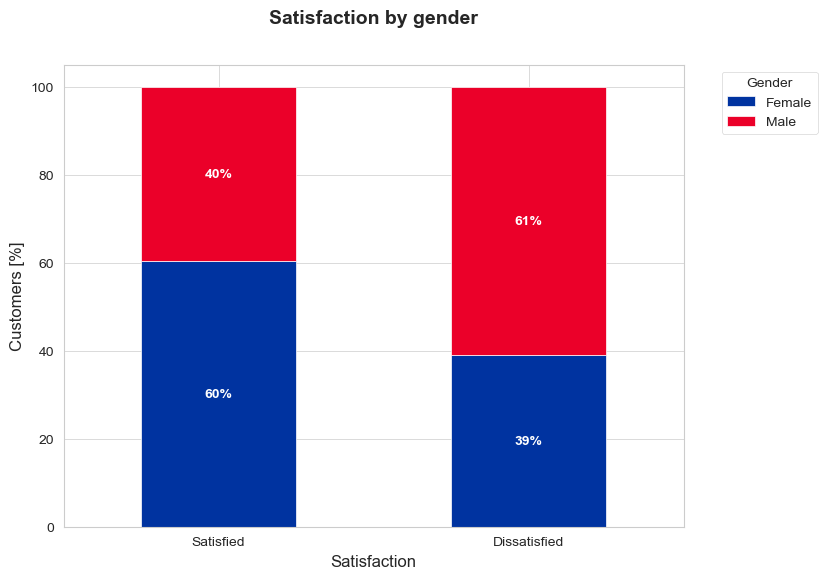

In [19]:
#Me traigo la satisfaccion
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Satisfacción'+Style.RESET_ALL)
satisf = df['satisfaction'].value_counts() / df['satisfaction'].count() * 100
print(satisf.map('{:.1f}%'.format))
print()

#Analizo la satisfaccion por sexo
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Porcentaje de satisfechos por Sexo'+Style.RESET_ALL)
gender_satisfechos = df[['Gender','satisfaction','satisf_binaria']].groupby('Gender')['satisf_binaria'].mean() * 100 
print(gender_satisfechos.map('{:.1f}%'.format))
print()

gender_dif = np.diff(gender_satisfechos)[0]
print('Hay una diferencia de',abs(gender_dif.astype(int)),'p.p. entre sexos')
print()

#Creo las variables que necesito para graficar
gender_nom = df.groupby(['satisfaction', 'Gender']).size().unstack(fill_value=0)
gender_pct = gender_nom.div(gender_nom.sum(axis=1), axis=0) * 100
gender_pct_sort = gender_pct.sort_values(by='satisfaction', ascending = False)

#Grafico y contextualizo
sns.set_style("whitegrid")  

ax = gender_pct_sort.plot(kind='bar', stacked=True, figsize=(8, 6), color=colores)

plt.title("Satisfaction by gender",
fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Satisfaction')
ax = plt.gca()
ax.set_xticklabels(["Satisfied", "Dissatisfied"])
plt.ylabel('Customers [%]')
plt.legend(title = 'Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()
plt.xticks(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')


Edades
| Satisfacción   |   Min |   Median |   Max |   Mean |   Mode |   DesvStd |   CV [%] |
|----------------+-------+----------+-------+--------+--------+-----------+----------|
| Dissatisfied   |     7 |       36 |    85 |     37 |     25 |        15 |  40.5405 |
| Satisfied      |     7 |       42 |    85 |     41 |     39 |        14 |  34.1463 |

Coeficiente de asimetría para ambos estados de satisfacción
El coeficiente de asimetría para los usuarios satisfechos es de -0.24
El coeficiente de asimetría para los usuarios insatisfechos es de 0.27



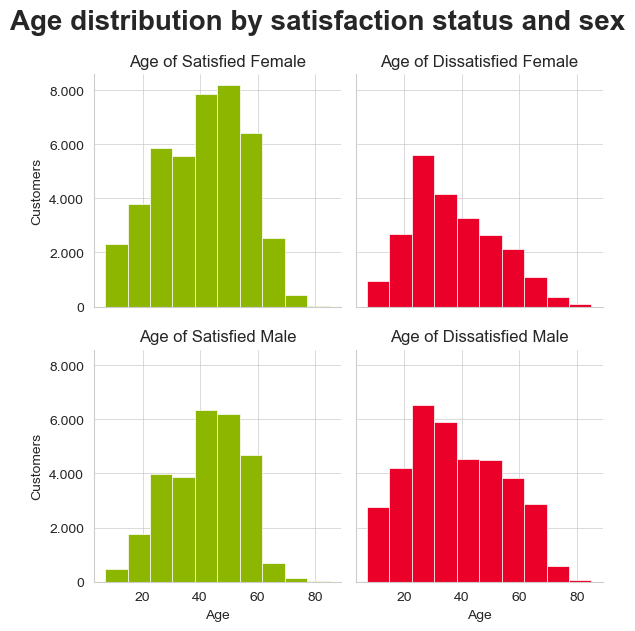

In [20]:
#Me traigo la edad media por estado de satisfacción
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Edades'+Style.RESET_ALL)
age_satisf_mean = df[['satisfaction','Age']].groupby('satisfaction')['Age'].mean().astype(int)
age_satisf_max = df[['satisfaction','Age']].groupby('satisfaction')['Age'].max().astype(int)
age_satisf_min = df[['satisfaction','Age']].groupby('satisfaction')['Age'].min().astype(int)
age_satisf_median = df[['satisfaction','Age']].groupby('satisfaction')['Age'].median().astype(int)
age_satisf_desv = df[['satisfaction','Age']].groupby('satisfaction')['Age'].std().astype(int)
age_satisf_mode = df[['satisfaction','Age']].groupby('satisfaction')['Age'].apply(lambda x: x.mode().astype(int))
age_satisf_cv = age_satisf_desv/age_satisf_mean * 100

tabla_age = pd.DataFrame({
    'Satisfacción': age_satisf_mean.index,
    'Min': age_satisf_min.values,
    'Median': age_satisf_median.values,
    'Max': age_satisf_max.values,
    'Mean': age_satisf_mean.values,
    'Mode': age_satisf_mode.values,
    'DesvStd': age_satisf_desv.values,
    'CV [%]': age_satisf_cv.values,
})

tabla_formateada_age = tabulate(tabla_age, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_age)
print()

print(Style.BRIGHT+Fore.LIGHTRED_EX+'Coeficiente de asimetría para ambos estados de satisfacción'+Style.RESET_ALL)
coeficiente_asimetria = skew(df[df['satisfaction'] == 'Satisfied']['Age'].dropna())
print('El coeficiente de asimetría para los usuarios satisfechos es de',round(coeficiente_asimetria,2))
coeficiente_asimetria_1 = skew(df[df['satisfaction'] == 'Dissatisfied']['Age'].dropna())
print('El coeficiente de asimetría para los usuarios insatisfechos es de',round(coeficiente_asimetria_1,2))
print()

#Grafico y contextualizo
sns.set_style("whitegrid")  
paleta_colores = {'Satisfied': '#8DB600' , 'Dissatisfied': '#eb0029'}

ax = sns.FacetGrid(df,
                  col = "satisfaction",  
                  row = "Gender",
                  palette = paleta_colores
                  )
ax.map(sns.histplot, "Age", bins = 10)

ax.set_titles(template="Age of {col_name} {row_name}", fontsize = 6)

ax.set_axis_labels("Age", "Customers", fontsize = 10)

plt.suptitle("Age distribution by satisfaction status and sex", fontsize=20, fontweight='bold', y=1.05)

for i, row in enumerate(ax.axes):
    for j, col in enumerate(row):
        bars = col.patches
        satisfaction_category = ax.col_names[j]
        color = paleta_colores[satisfaction_category]
        for bar in bars:
            bar.set_facecolor(color)
            
for i, row in enumerate(ax.axes):
    for j, col in enumerate(row):
        col.yaxis.set_major_formatter(FuncFormatter(format_thousands))
        
ax = plt.gca()

#### <span style="color:gray">**3.2. Loyalty and Satisfaction**</span>
Un usuario satisfecho puede volverse leal y un usuario leal debe estar satisfecho para volverse en recurrente. 

El estudio de Leon, Dixon y colaboradores (2023) sobre la satisfacción y lealtad en la industria aérea de EE. UU. revela una relación crucial entre la satisfacción del cliente y la lealtad. Los resultados destacan que la calidad del servicio, la confianza y la lealtad por compromiso impactan positivamente en la satisfacción, influyendo así en una mayor lealtad por intención de comportamiento. Se observa que la calidad del servicio, la confianza, la apertura y la amabilidad tienen efectos positivos en la satisfacción, mientras que la extraversión la afecta negativamente. Este análisis, basado en una muestra de 624 encuestados y utilizando regresión de mínimos cuadrados ordinarios, proporciona evidencia empírica de los efectos de los rasgos de personalidad, la confianza organizacional y la lealtad por compromiso en la satisfacción y lealtad del cliente en la industria aérea de EE. UU.

Para el caso de Invistico, los usuarios Loyal son el 80% de la encuesta, por esto es que deberían ser el foco de atención del análisis. Observando los resultados, los usuarios Loyal son más propensos a encontrarse satisfechos, sin embargo, los niveles de satisfacción se encuentran 8 p.p. por debajo del objetivo establecido de 70%, habiendo espacios de mejora. 

Tipo de cliente
| Tipo de Cliente   |   Frecuencia | Porcentaje   |
|-------------------+--------------+--------------|
| Loyal Customer    |       106100 | 81.7%        |
| Disloyal Customer |        23780 | 18.3%        |

Porcentaje de satisfechos por Tipo de cliente
Customer Type
Disloyal Customer    24.0%
Loyal Customer       61.6%
Name: satisf_binaria, dtype: object

Hay una diferencia de 37 p.p. entre tipo de clientes



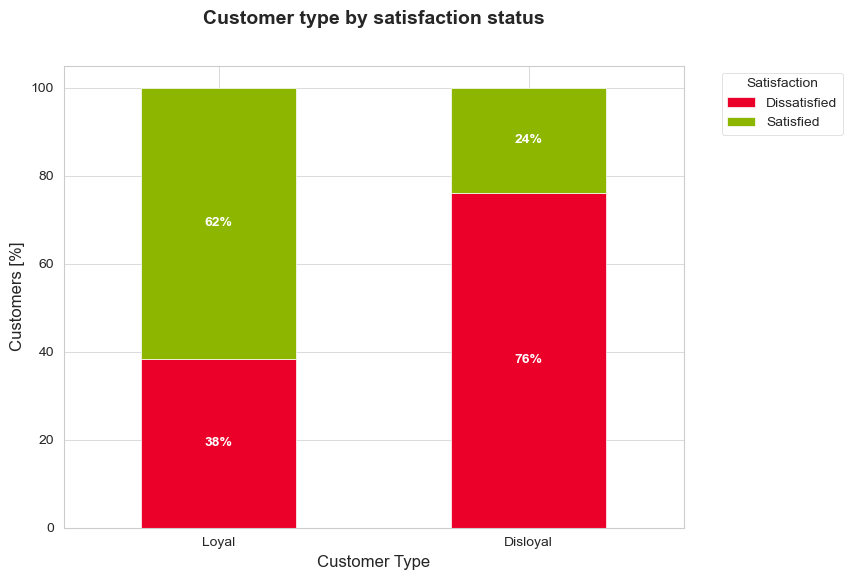

In [21]:
#Me traigo la cantidad de pasajeros en cada uno de los tipos de clientes
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Tipo de cliente'+Style.RESET_ALL)
tipo_cliente_nom = df['Customer Type'].value_counts()
tipo_cliente_pct = (df['Customer Type'].value_counts() / df['Customer Type'].count() * 100).map('{:.1f}%'.format)

tabla_tipo_cliente = pd.DataFrame({
    'Tipo de Cliente': tipo_cliente_nom.index,
    'Frecuencia': tipo_cliente_nom.values,
    'Porcentaje': tipo_cliente_pct.values
})

tabla_formateada_tipo_cliente = tabulate(tabla_tipo_cliente, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_tipo_cliente)
print()

#Analizo la satisfaccion por tipo de cliente
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Porcentaje de satisfechos por Tipo de cliente'+Style.RESET_ALL)
customer_satisfechos = df[['Customer Type','satisfaction','satisf_binaria']].groupby('Customer Type')['satisf_binaria'].mean() * 100 
print(customer_satisfechos.map('{:.1f}%'.format))
print()

customer_dif = np.diff(customer_satisfechos)[0]
print('Hay una diferencia de',abs(customer_dif.astype(int)),'p.p. entre tipo de clientes')
print()

#Creo variables para graficar
customer_nom = df.groupby(['Customer Type', 'satisfaction']).size().unstack(fill_value=0)
customer_pct = customer_nom.div(customer_nom.sum(axis=1), axis=0) * 100
customer_pct_sort = customer_pct.sort_values(by='Customer Type', ascending = False)

#Grafico y contextualizo
sns.set_style("whitegrid")  

ax = customer_pct_sort.plot(kind='bar', stacked=True, figsize=(8, 6), color=colores_satif)

plt.title("Customer type by satisfaction status",
fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Customer Type')
ax = plt.gca()
ax.set_xticklabels(["Loyal", "Disloyal"])
plt.ylabel('Customers [%]')
plt.legend(title = 'Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()
plt.xticks(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')


#### <span style="color:gray">**3.3. "Business or Pleasure"**</span>
En un contexto más amplio, se destaca una tendencia decreciente en la satisfacción general de los clientes en la industria aérea, según un reciente estudio sobre la satisfacción en aerolíneas. Este declive se atribuye a desafíos significativos que enfrentan las aerolíneas, tales como el aumento de precios, restricciones en la disponibilidad de vuelos y la reducción de rutas.

Al observar más de cerca la relación entre la satisfacción del cliente y las clases de viaje, se revelan matices importantes. Aunque la satisfacción general ha disminuido, ciertos segmentos, como first/business, han experimentado una experiencia más positiva. Por otro lado, la presión económica ha impactado más fuertemente en los viajeros de economy/basic economy, quienes han experimentado una disminución significativa en la satisfacción, especialmente en aspectos relacionados con costos y tarifas.

Estos resultados sugieren que, mientras las aerolíneas enfrentan desafíos sistémicos que afectan la satisfacción general, las disparidades entre las clases de viaje resaltan la necesidad de estrategias específicas para abordar las preocupaciones de cada segmento de clientes.

Para nuestro caso, los viajes de negocio, que representan el 69% del total, son los más frecuentes. Aunque ambos servicios (Negocios y Personal) están por debajo del nivel de satisfacción deseado del 70%, el servicio de viaje Personal es el más afectado. La composición de los tipos de viaje por clase revela que la mayoría de los viajes de negocios se realizan en Business Class, explicando así por qué este grupo presenta una satisfacción superior. 

En contraste, los usuarios de clase económica (Eco), que constituyen casi el 50% de la clientela total, experimentan la satisfacción más baja, con menos del 40%. Por otro lado, los usuarios de Business (primera clase) muestran el mayor nivel de satisfacción, lo que se atribuye a la comodidad de los asientos y el servicio premium. Dado que la satisfacción de los usuarios de Business supera la meta de la aerolínea, se sugiere redirigir los esfuerzos para mejorar la satisfacción hacia las clases con niveles inferiores al objetivo en aproximadamente 30 puntos porcentuales.

Tipo de viaje
| Tipo de viaje   |   Frecuencia | Porcentaje   |
|-----------------+--------------+--------------|
| Business Travel |        89693 | 69.1%        |
| Personal Travel |        40187 | 30.9%        |

Porcentaje de satisfechos por Tipo de Viaje
Type of Travel
Business Travel    58.4%
Personal Travel    46.6%
Name: satisf_binaria, dtype: object

Hay una diferencia de 11 p.p. entre tipos de viaje



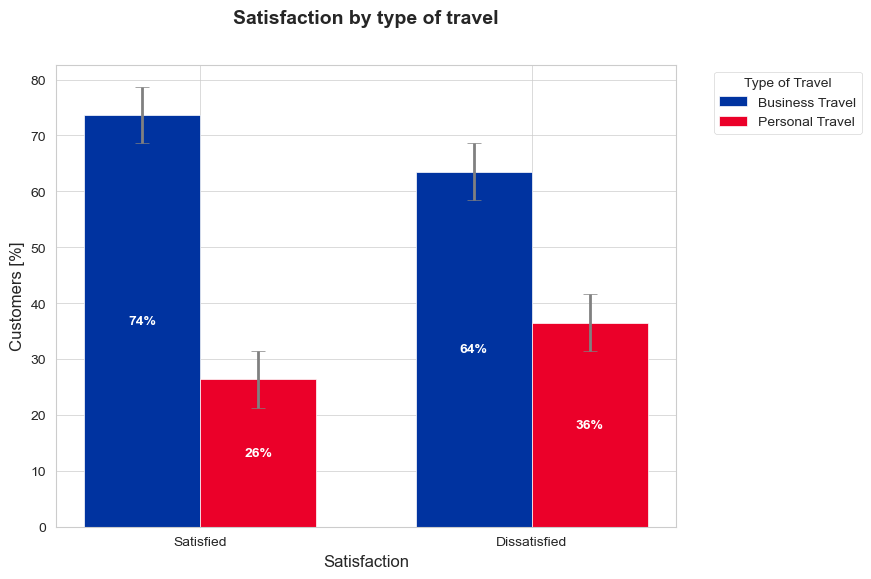

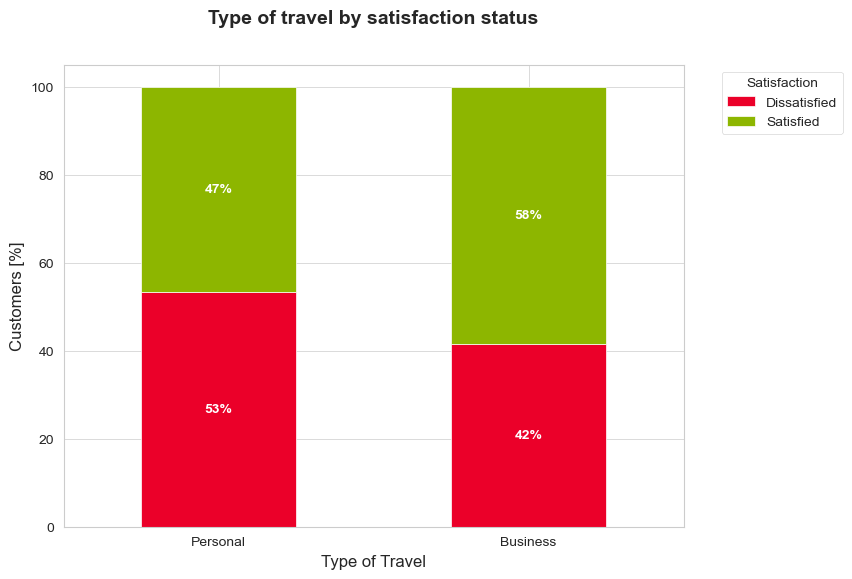

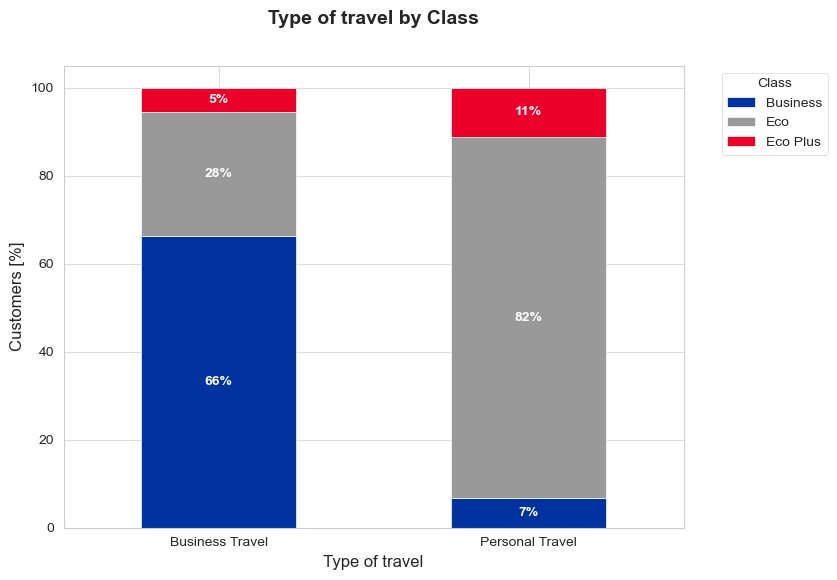

In [22]:
#Me traigo la cantidad de pasajeros en cada uno de los tipos de viajes
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Tipo de viaje'+Style.RESET_ALL)
tipo_viaje_nom = df['Type of Travel'].value_counts()
tipo_viaje_pct = (df['Type of Travel'].value_counts() / df['Type of Travel'].count() * 100).map('{:.1f}%'.format)

tabla_tipo_viaje = pd.DataFrame({
    'Tipo de viaje': tipo_viaje_nom.index,
    'Frecuencia': tipo_viaje_nom.values,
    'Porcentaje': tipo_viaje_pct.values
})

tabla_formateada_tipo_viaje = tabulate(tabla_tipo_viaje, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_tipo_viaje)
print()

#Analizo la satisfaccion por tipo de viaje
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Porcentaje de satisfechos por Tipo de Viaje'+Style.RESET_ALL)
travel_satisfechos = df[['Type of Travel','satisfaction','satisf_binaria']].groupby('Type of Travel')['satisf_binaria'].mean() * 100 
print(travel_satisfechos.map('{:.1f}%'.format))
print()

travel_dif = np.diff(travel_satisfechos)[0]
print('Hay una diferencia de',abs(travel_dif.astype(int)),'p.p. entre tipos de viaje')
print()

#Creo las variables que necesito para graficar
travel_nom = df.groupby(['satisfaction', 'Type of Travel']).size().unstack(fill_value=0)
travel_pct = travel_nom.div(travel_nom.sum(axis=1), axis=0) * 100
travel_pct_sort = travel_pct.sort_values(by='satisfaction', ascending = False)

#Grafico y contextualizo
sns.set_style("whitegrid")  

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
bar_positions = np.arange(len(travel_pct_sort.index))

bars_satisfied = plt.bar(bar_positions, travel_pct_sort['Business Travel'], width=bar_width, label='Business Travel', color='#0033a0')
bars_dissatisfied = plt.bar(bar_positions + bar_width, travel_pct_sort['Personal Travel'], width=bar_width, label='Personal Travel', color= '#eb0029')

# Agrego barras de error
errors_satisfied = plt.errorbar(
    bar_positions,
    travel_pct_sort['Business Travel'],
    yerr=np.std(travel_pct_sort['Business Travel']),
    fmt='none',
    color='gray',
    capsize=5,
    capthick=0.5
)

errors_dissatisfied = plt.errorbar(
    bar_positions + bar_width,
    travel_pct_sort['Personal Travel'],
    yerr=np.std(travel_pct_sort['Personal Travel']),
    fmt='none',
    color='gray',
    capsize=5,
    capthick=0.5
)

plt.title("Satisfaction by type of travel", fontsize=14, fontweight='bold', pad=30)
plt.xlabel('Satisfaction')
plt.ylabel('Customers [%]')
plt.legend(title='Type of Travel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(bar_positions + bar_width / 2, ["Satisfied", "Dissatisfied"])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')

plt.show()


#Creo variables para graficar la satisfacción según el tipo de viaje
travel1_nom = df.groupby(['Type of Travel', 'satisfaction']).size().unstack(fill_value=0)
travel1_pct = travel1_nom.div(travel1_nom.sum(axis=1), axis=0) * 100
travel1_pct_sort = travel1_pct.sort_values(by='Type of Travel', ascending = False)

#Grafico y contextualizo
sns.set_style("whitegrid")  

ax = travel1_pct_sort.plot(kind='bar', stacked=True, figsize=(8, 6), color=colores_satif)

plt.title("Type of travel by satisfaction status", fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Type of Travel')
ax = plt.gca()
ax.set_xticklabels(["Personal", "Business"])
plt.ylabel('Customers [%]')
plt.legend(title = 'Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()
plt.xticks(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')

# Agrupo los datos por Class y Type of Travel y cuento la cantidad de usuarios
agrupado = df.groupby(['Type of Travel','Class']).size().unstack(fill_value=0)
agrupado_pct = agrupado.div(agrupado.sum(axis=1), axis=0) * 100
custom_colors = ['#0033a0', '#999999','#eb0029']

ax = agrupado_pct.plot(kind='bar', stacked=True, figsize=(8, 6), color=custom_colors)

plt.title("Type of travel by Class", fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Type of travel')
plt.ylabel('Customers [%]')
plt.legend(title='Class',  bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight='bold')

plt.show()


Clase de vuelo
| Clase    |   Frecuencia | Porcentaje   |
|----------+--------------+--------------|
| Business |        62160 | 47.9%        |
| Eco      |        58309 | 44.9%        |
| Eco Plus |         9411 | 7.2%         |

Porcentaje de satisfechos por Clase
Class
Business    70.9%
Eco         39.4%
Eco Plus    42.7%
Name: satisf_binaria, dtype: object

Hay una diferencia de 31 p.p. entre clases



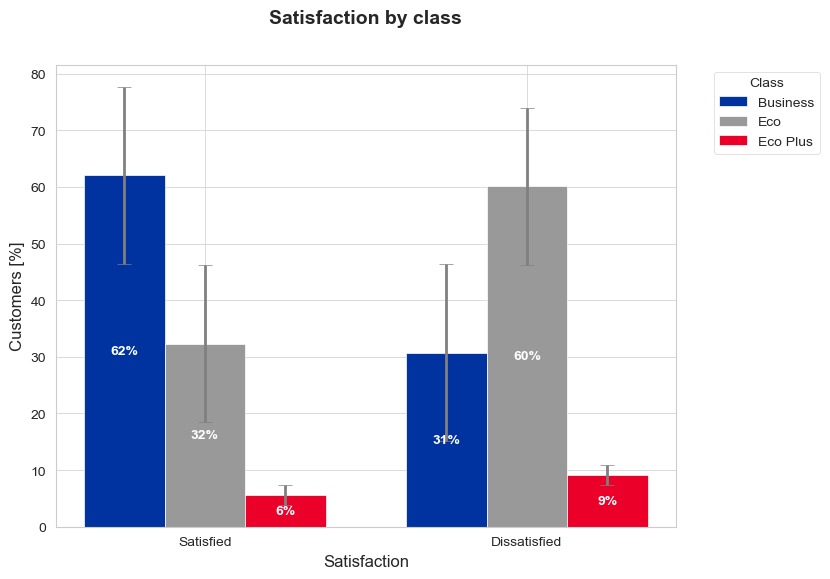

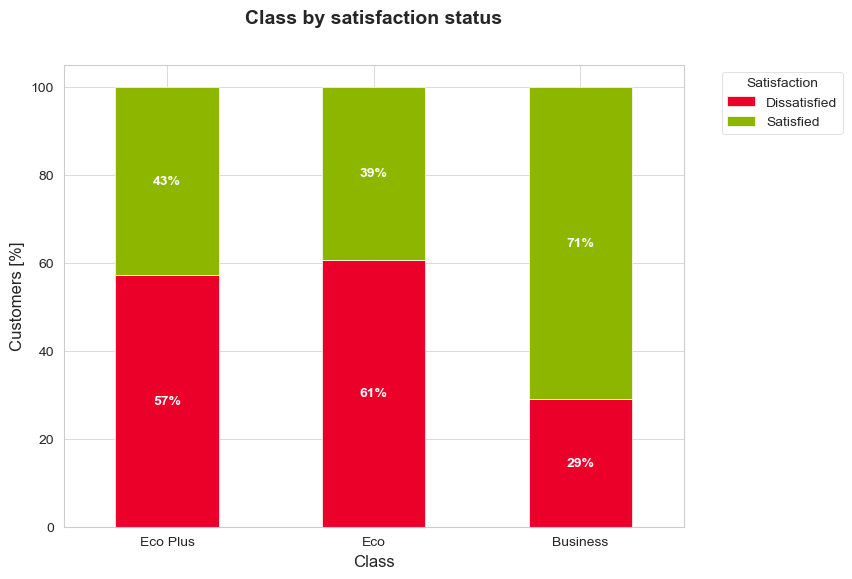

In [23]:
#Me traigo la cantidad de pasajeros en cada uno de las clases de vuelos
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Clase de vuelo'+Style.RESET_ALL)
clase_nom = df['Class'].value_counts()
clase_pct = (df['Class'].value_counts() / df['Class'].count() * 100).map('{:.1f}%'.format)

tabla_clase = pd.DataFrame({
    'Clase': clase_nom.index,
    'Frecuencia': clase_nom.values,
    'Porcentaje': clase_pct.values
})

tabla_formateada_clase = tabulate(tabla_clase, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_clase)
print()

#Analizo la satisfaccion por clase
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Porcentaje de satisfechos por Clase'+Style.RESET_ALL)
class_satisfechos = df[['Class','satisfaction','satisf_binaria']].groupby('Class')['satisf_binaria'].mean() * 100 
print(class_satisfechos.map('{:.1f}%'.format))
print()

class_dif = np.diff(class_satisfechos)[0]
print('Hay una diferencia de',abs(class_dif.astype(int)),'p.p. entre clases')
print()

#Creo las variables que necesito para graficar
class_nom = df.groupby(['satisfaction', 'Class']).size().unstack(fill_value=0)
class_pct = class_nom.div(class_nom.sum(axis=1), axis=0) * 100
class_pct_sort = class_pct.sort_values(by='satisfaction', ascending = False)

#Grafico y contextualizo
sns.set_style("whitegrid")  

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.25
bar_positions = np.arange(len(class_pct_sort.index))
classes = class_pct_sort.columns
custom_colors = ['#0033a0', '#999999','#eb0029']

for i, class_type in enumerate(classes):
    bars = plt.bar(
        bar_positions + i * bar_width,
        class_pct_sort[class_type],
        width=bar_width,
        label=class_type,
        color=custom_colors[i],
    )
    
# Agrego barras de error
    plt.errorbar(
        bar_positions + i * bar_width,
        class_pct_sort[class_type],
        yerr=np.std(class_pct_sort[class_type]),
        fmt='none',
        color='gray',
        capsize=5,
        capthick=0.5
    )

plt.title("Satisfaction by class", fontsize=14, fontweight='bold', pad=30)
plt.xlabel('Satisfaction')
plt.ylabel('Customers [%]')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(bar_positions + bar_width * (len(classes) - 1) / 2, ["Satisfied", "Dissatisfied"])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')

plt.show()


#Creo variables para graficar la satisfacción según el tipo de viaje
class1_nom = df.groupby(['Class', 'satisfaction']).size().unstack(fill_value=0)
class1_pct = class1_nom.div(class1_nom.sum(axis=1), axis=0) * 100
class1_pct_sort = class1_pct.sort_values(by='Class', ascending = False)

#Grafico y contextualizo
sns.set_style("whitegrid")  

ax = class1_pct_sort.plot(kind='bar', stacked=True, figsize=(8, 6), color=colores_satif)

plt.title("Class by satisfaction status",
fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Class')
ax = plt.gca()
ax.set_xticklabels(["Eco Plus", "Eco", "Business"])
plt.ylabel('Customers [%]')
plt.legend(title = 'Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()
plt.xticks(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight = 'bold')


#### <span style="color:gray">**3.4. Factores en la Experiencia Aérea**</span>
En el análisis detallado de los factores que impactan la satisfacción del cliente en la industria aérea, se identifican tendencias significativas que encuentran resonancia en la situación de Invistico. La segmentación de servicios en "servicios a bordo," "servicios online," y "servicios del aeropuerto" ha permitido revelar patrones reveladores.

De manera destacada, se observa que, al igual que en la industria aérea en general, la satisfacción overall en este caso parece estar fuertemente influenciada por la eficacia y calidad de los "servicios online" y "servicios del aeropuerto." Estos aspectos, que abarcan desde la interacción en línea hasta la experiencia en el aeropuerto, emergen como factores críticos que moldean la percepción global de los clientes.

Contrastando con esta tendencia, se nota que los "servicios a bordo" no parecen tener una relación directa y clara con la satisfacción overall. Este hallazgo sugiere que, aunque la calidad de la experiencia de vuelo es esencial, otros componentes fuera del vuelo en sí, como la eficiencia y calidad en servicios online y del aeropuerto, desempeñan un papel fundamental en la formación de la satisfacción general del cliente.

A priori, estos insights resaltan la necesidad de enfocar las estrategias y mejoras específicamente en áreas como servicios online y del aeropuerto, que han demostrado ser determinantes clave de la satisfacción del cliente. Al alinearse con las tendencias de la industria y priorizar estas dimensiones, se puede abordar de manera más efectiva las expectativas y necesidades de los clientes, impulsando así una mejora significativa en la satisfacción general.

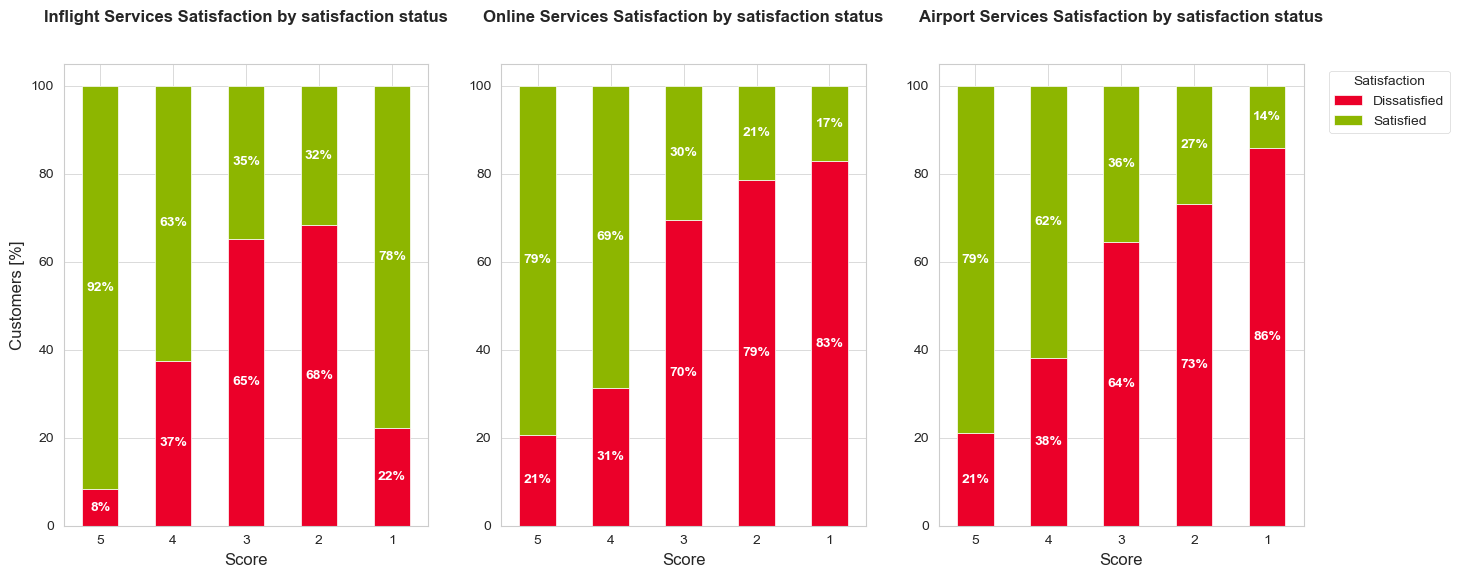

In [24]:
#Creo variables nuevas que generalicen los tipos de features
inflight_services = np.ceil(df[['Seat comfort','Food and drink','Inflight wifi service','Inflight entertainment','Leg room service','Cleanliness','Departure/Arrival time convenient']].mean(axis=1)).astype(int)
online_services = np.ceil(df[['Online support', 'Ease of Online booking','Online boarding']].mean(axis=1)).astype(int)
airport_services = np.ceil(df[['Gate location', 'On-board service','Baggage handling','Checkin service']].mean(axis=1)).astype(int)
df['Inflight services'] = inflight_services
df['Online services'] = online_services
df['Airport services'] = airport_services

#Entiendo las variables creadas en relación a la satisfacción. Creo variables para graficar
infight_nom = df.groupby(['Inflight services','satisfaction']).size().unstack(fill_value=0)
infight_pct = infight_nom.div(infight_nom.sum(axis=1), axis=0) * 100
infight_pct_sort = infight_pct.sort_values(by='Inflight services', ascending = False)

online_nom = df.groupby(['Online services','satisfaction']).size().unstack(fill_value=0)
online_pct = online_nom.div(online_nom.sum(axis=1), axis=0) * 100
online_pct_sort = online_pct.sort_values(by='Online services', ascending = False)

airport_nom = df.groupby(['Airport services','satisfaction']).size().unstack(fill_value=0)
airport_pct = airport_nom.div(airport_nom.sum(axis=1), axis=0) * 100
airport_pct_sort = airport_pct.sort_values(by='Airport services', ascending = False)

# Grafico y contextualizo
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Grafico Inflight Services
ax1 = infight_pct_sort.plot(kind='bar', stacked=True, color=['#eb0029','#8DB600'], ax=axes[0])
ax1.set_title('Inflight Services Satisfaction by satisfaction status', fontsize=12, fontweight='bold', pad=30)
ax1.set_xlabel('Score', fontsize=12)
ax1.set_ylabel('Customers [%]', fontsize=12)
ax1.legend().set_visible(False)  
ax1.tick_params(axis='x', rotation=0)
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Grafico Online Services
ax2 = online_pct_sort.plot(kind='bar', stacked=True, color=['#eb0029','#8DB600'], ax=axes[1])
ax2.set_title('Online Services Satisfaction by satisfaction status', fontsize=12, fontweight='bold', pad=30)
ax2.set_xlabel('Score', fontsize=12)
ax2.legend().set_visible(False)  
ax2.tick_params(axis='x', rotation=0)
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax2.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Grafico Airport Services
ax3 = airport_pct_sort.plot(kind='bar', stacked=True, color=['#eb0029','#8DB600'], ax=axes[2])
ax3.set_title('Airport Services Satisfaction by satisfaction status', fontsize=12, fontweight='bold', pad=30)
ax3.set_xlabel('Score', fontsize=12)
ax3.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.tick_params(axis='x', rotation=0)
for p in ax3.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax3.annotate(f'{height:.0f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white', fontweight='bold')

plt.show()


#### <span style="color:gray">**3.5. Tiempos de vuelo y Retrasos**</span>
En el análisis de la industria aérea, se resalta la presencia significativa de problemas operativos, como retrasos de vuelos, pérdida de equipaje y restricciones en la disponibilidad de vuelos. Aunque estos aspectos no son mencionados con la misma frecuencia que los problemas relacionados con costos y tarifas, su influencia en la complejidad operativa es evidente.

Simultáneamente, al examinar nuestros propios datos, observamos que los vuelos más extensos muestran niveles sustanciales de insatisfacción entre los usuarios. Este hallazgo plantea interrogantes sobre la relación entre la satisfacción del cliente, la longitud del vuelo y la elección de la clase de servicio. Específicamente, se indaga sobre la proporción de usuarios satisfechos en vuelos largos que optan por la clase Business y la distribución de usuarios insatisfechos en vuelos cortos entre las clases Business y Economy.

Adicionalmente, se identifica que la duración de los retrasos presenta una dispersión elevada en cada estado de satisfacción. La propuesta de formar clusters basados en los tiempos de retrasos busca entender el comportamiento de cada grupo en relación con la satisfacción. Este enfoque permitirá determinar el punto de quiebre donde los usuarios pasan de estar satisfechos a insatisfechos, proporcionando una perspectiva crucial para abordar de manera efectiva los desafíos operativos y mejorar la experiencia general del usuario.

Distancias [km]
| Satisfacción   |   Min |   Median |   Max |   Mean |   Mode |   DesvStd |
|----------------+-------+----------+-------+--------+--------+-----------|
| Dissatisfied   |    50 |     1955 |  6951 |   2025 |   1963 |       888 |
| Satisfied      |    50 |     1886 |  6950 |   1944 |   1625 |      1127 |

Hay una diferencia de 81 km entre los estados de satisfacción



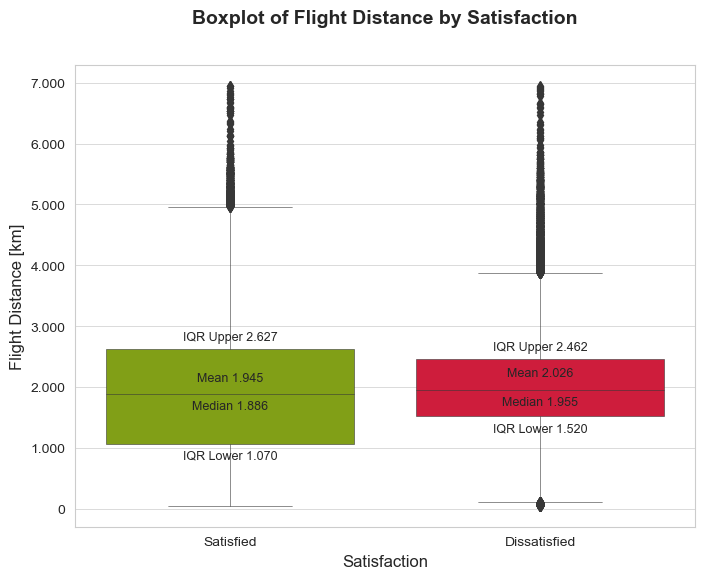

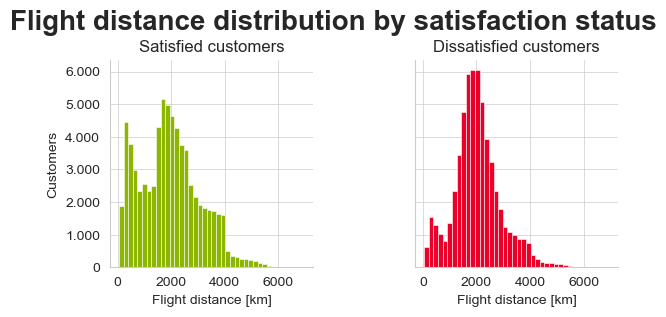

In [25]:
# Me traigo la distancia media por estado de satisfacción
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Distancias [km]'+Style.RESET_ALL)
dist_satisf_mean = df[['satisfaction','Flight Distance']].groupby('satisfaction')['Flight Distance'].mean().astype(int)
dist_satisf_max = df[['satisfaction','Flight Distance']].groupby('satisfaction')['Flight Distance'].max().astype(int)
dist_satisf_min = df[['satisfaction','Flight Distance']].groupby('satisfaction')['Flight Distance'].min().astype(int)
dist_satisf_median = df[['satisfaction','Flight Distance']].groupby('satisfaction')['Flight Distance'].median().astype(int)
dist_satisf_desv = df[['satisfaction','Flight Distance']].groupby('satisfaction')['Flight Distance'].std().astype(int)
dist_satisf_mode = df[['satisfaction','Flight Distance']].groupby('satisfaction')['Flight Distance'].apply(lambda x: x.mode().iat[0].astype(int))

tabla_dist = pd.DataFrame({
    'Satisfacción': dist_satisf_mean.index,
    'Min': dist_satisf_min.values,
    'Median': dist_satisf_median.values,
    'Max': dist_satisf_max.values,
    'Mean': dist_satisf_mean.values,
    'Mode': dist_satisf_mode.values,
    'DesvStd': dist_satisf_desv.values
})

tabla_formateada_dist = tabulate(tabla_dist, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_dist)
print()

dist_dif = np.diff(dist_satisf_mean)[0]
print('Hay una diferencia de',abs(dist_dif.astype(int)),'km entre los estados de satisfacción')
print()

#Grafico y contextualizo
sns.set_style("whitegrid")  

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='satisfaction', y='Flight Distance', data=df, palette=['#8DB600','#eb0029'], linewidth=0.4)

# Añadir etiquetas para la media, mediana y rangos
for i, satisfaction_level in enumerate(df['satisfaction'].unique()):
    data = df[df['satisfaction'] == satisfaction_level]['Flight Distance']
    mean = data.mean()
    median = data.median()
    lower, upper = data.quantile([0.25, 0.75])
    
    # Etiqueta para la media
    ax.annotate(f'Mean {format_thousands(mean,0)}', xy=(i, mean), xytext=(i, mean+100),
                ha='center', va='bottom',fontsize=9)
    
    # Etiqueta para la mediana
    ax.annotate(f'Median {format_thousands(median,0)}', xy=(i, median), xytext=(i, median-100),
                ha='center', va='top',fontsize=9)
    
    # Etiquetas para los rangos intercuartílicos (IQR)
    ax.annotate(f'IQR Upper {format_thousands(upper,0)}', xy=(i, upper), xytext=(i, upper+300),
                 ha='center', va='top',fontsize=9)
    ax.annotate(f'IQR Lower {format_thousands(lower,0)}', xy=(i, lower), xytext=(i, lower-300),
                 ha='center', va='bottom',fontsize=9)

ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))
    
plt.title("Boxplot of Flight Distance by Satisfaction",fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Satisfaction')
plt.ylabel('Flight Distance [km]')
plt.show()

#Grafico y contextualizo
sns.set_style("whitegrid")  
paleta_colores = {'Satisfied': '#8DB600' , 'Dissatisfied': '#eb0029'}

ax = sns.FacetGrid(df,
                  col = "satisfaction",  
                  palette = paleta_colores,
                  )
ax.map(sns.histplot, "Flight Distance", bins = 40)

ax.set_titles(template="{col_name} customers", fontsize = 6)

ax.set_axis_labels("Flight distance [km]", "Customers", fontsize = 10)

plt.suptitle("Flight distance distribution by satisfaction status", fontsize=20, fontweight='bold', y=1.05)

for i, row in enumerate(ax.axes):
    for j, col in enumerate(row):
        bars = col.patches
        satisfaction_category = ax.col_names[j]
        color = paleta_colores[satisfaction_category]
        for bar in bars:
            bar.set_facecolor(color)
            
for i, row in enumerate(ax.axes):
    for j, col in enumerate(row):
        col.yaxis.set_major_formatter(FuncFormatter(format_thousands))
        
plt.subplots_adjust(wspace=0.5)

ax = plt.gca()

In [26]:
# Filtra los valores diferentes de 0
df_filtered = df[df['Departure Delay in Minutes'] != 0]

# Calcula las estadísticas
departure_mean = df_filtered[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].mean().astype(int)
departure_max = df_filtered[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].max().astype(int)
departure_min = df_filtered[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].min().astype(int)
departure_median = df_filtered[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].median().astype(int)
departure_desv = df_filtered[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].std().astype(int)
departure_mode = df_filtered[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].apply(lambda x: x.mode().iat[0].astype(int))

# Crea la tabla
tabla_departure = pd.DataFrame({
    'Satisfacción': departure_mean.index,
    'Min': departure_min.values,
    'Median': departure_median.values,
    'Max': departure_max.values,
    'Mean': departure_mean.values,
    'Mode': departure_mode.values,
    'DesvStd': departure_desv.values
})

# Imprime la tabla formateada
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Departure delay [minutes]'+Style.RESET_ALL)
tabla_formateada_departure = tabulate(tabla_departure, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_departure)
print()

departure_dif = np.diff(departure_mean)[0]
print('Hay una diferencia de',abs(departure_dif.astype(int)),'min entre los estados de satisfacción')
print()

#Saco los outliers
Q1 = df_filtered['Departure Delay in Minutes'].quantile(0.25)
Q3 = df_filtered['Departure Delay in Minutes'].quantile(0.75)
IQR = Q3 - Q1

filtered_data = df_filtered[~((df_filtered['Departure Delay in Minutes'] < (Q1 - 1.5 * IQR)) | (df_filtered['Departure Delay in Minutes'] > (Q3 + 1.5 * IQR)))]

# Calcula las estadísticas
departure_mean = filtered_data[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].mean().astype(int)
departure_max = filtered_data[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].max().astype(int)
departure_min = filtered_data[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].min().astype(int)
departure_median = filtered_data[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].median().astype(int)
departure_desv = filtered_data[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].std().astype(int)
departure_mode = filtered_data[['satisfaction', 'Departure Delay in Minutes']].groupby('satisfaction')['Departure Delay in Minutes'].apply(lambda x: x.mode().iat[0].astype(int))

# Crea la tabla
tabla_departure = pd.DataFrame({
    'Satisfacción': departure_mean.index,
    'Min': departure_min.values,
    'Median': departure_median.values,
    'Max': departure_max.values,
    'Mean': departure_mean.values,
    'Mode': departure_mode.values,
    'DesvStd': departure_desv.values
})

# Imprime la tabla formateada
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Departure delay sin outliers [minutes]'+Style.RESET_ALL)
tabla_formateada_departure = tabulate(tabla_departure, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_departure)
print()

departure_dif = np.diff(departure_mean)[0]
print('Hay una diferencia de',abs(departure_dif.astype(int)),'min entre los estados de satisfacción')
print()


# Filtra los valores diferentes de 0
df_filtered_1 = df[df['Arrival Delay in Minutes'] != 0]

# Calcula las estadísticas
arrival_mean = df_filtered_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].mean().astype(int)
arrival_max = df_filtered_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].max().astype(int)
arrival_min = df_filtered_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].min().astype(int)
arrival_median = df_filtered_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].median().astype(int)
arrival_desv = df_filtered_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].std().astype(int)
arrival_mode = df_filtered_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].apply(lambda x: x.mode().iat[0].astype(int))

# Crea la tabla
tabla_arrival = pd.DataFrame({
    'Satisfacción': arrival_mean.index,
    'Min': arrival_min.values,
    'Median': arrival_median.values,
    'Max': arrival_max.values,
    'Mean': arrival_mean.values,
    'Mode': arrival_mode.values,
    'DesvStd': arrival_desv.values
})

# Imprime la tabla formateada
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Arrival delay [minutes]'+Style.RESET_ALL)
tabla_formateada_arrival = tabulate(tabla_arrival, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_arrival)
print()

arrival_dif = np.diff(arrival_mean)[0]
print('Hay una diferencia de',abs(arrival_dif.astype(int)),'min entre los estados de satisfacción')
print()

#Saco los outliers
Q1_1 = df_filtered_1['Arrival Delay in Minutes'].quantile(0.25)
Q3_1 = df_filtered_1['Arrival Delay in Minutes'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

filtered_data_1 = df_filtered_1[~((df_filtered_1['Arrival Delay in Minutes'] < (Q1_1 - 1.5 * IQR_1)) | (df_filtered_1['Arrival Delay in Minutes'] > (Q3_1 + 1.5 * IQR_1)))]

# Calcula las estadísticas
arrival_mean = filtered_data_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].mean().astype(int)
arrival_max = filtered_data_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].max().astype(int)
arrival_min = filtered_data_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].min().astype(int)
arrival_median = filtered_data_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].median().astype(int)
arrival_desv = filtered_data_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].std().astype(int)
arrival_mode = filtered_data_1[['satisfaction', 'Arrival Delay in Minutes']].groupby('satisfaction')['Arrival Delay in Minutes'].apply(lambda x: x.mode().iat[0].astype(int))

# Crea la tabla
tabla_arrival = pd.DataFrame({
    'Satisfacción': arrival_mean.index,
    'Min': arrival_min.values,
    'Median': arrival_median.values,
    'Max': arrival_max.values,
    'Mean': arrival_mean.values,
    'Mode': arrival_mode.values,
    'DesvStd': arrival_desv.values
})

# Imprime la tabla formateada
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Arrival delay sin outliers [minutes]'+Style.RESET_ALL)
tabla_formateada_arrival = tabulate(tabla_arrival, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada_arrival)
print()

arrival_dif = np.diff(arrival_mean)[0]
print('Hay una diferencia de',abs(arrival_dif.astype(int)),'min entre los estados de satisfacción')
print()


Departure delay [minutes]
| Satisfacción   |   Min |   Median |   Max |   Mean |   Mode |   DesvStd |
|----------------+-------+----------+-------+--------+--------+-----------|
| Dissatisfied   |     1 |       19 |  1592 |     38 |      1 |        57 |
| Satisfied      |     1 |       14 |  1305 |     29 |      1 |        45 |

Hay una diferencia de 9 min entre los estados de satisfacción

Departure delay sin outliers [minutes]
| Satisfacción   |   Min |   Median |   Max |   Mean |   Mode |   DesvStd |
|----------------+-------+----------+-------+--------+--------+-----------|
| Dissatisfied   |     1 |       15 |    91 |     22 |      1 |        21 |
| Satisfied      |     1 |       12 |    91 |     20 |      1 |        20 |

Hay una diferencia de 2 min entre los estados de satisfacción

Arrival delay [minutes]
| Satisfacción   |   Min |   Median |   Max |   Mean |   Mode |   DesvStd |
|----------------+-------+----------+-------+--------+--------+-----------|
| Dissatisfied   |     

### <span style="color:gray">**4. Prediciendo la satisfacción del cliente**</span>

Se comparan los modelos de clasificación de regresión logística y Random Forest.

#### <span style="color:gray">**4.1. Encoding**</span>

In [27]:
# Estudio los campos object
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Datos en cada campo object'+Style.RESET_ALL)
print('- Satisfaction: ',satisf)
print('- Gender: ',gender)
print('- Customer Type: ',cust_type)
print('- Type of Travel: ',type_travel)
print('- Class: ',cust_class)

Datos en cada campo object
- Satisfaction:  satisfaction
Satisfied       54.73283
Dissatisfied    45.26717
Name: count, dtype: float64
- Gender:  ['Female' 'Male']
- Customer Type:  ['Loyal Customer' 'Disloyal Customer']
- Type of Travel:  ['Personal Travel' 'Business Travel']
- Class:  ['Eco' 'Business' 'Eco Plus']


In [28]:
#Creo una columna satisfaccion binaria que indica 1 si la respuesta es satisfied y 0 en caso contrario
satisf_binaria = df['satisfaction'].apply(lambda x: 1 if x == 'Satisfied' else 0)
df['satisf_binaria'] = satisf_binaria
df['Es_Satisfied'] = np.where(df['satisf_binaria'] == 1, 1, 0)

#Creo una columna gender_binaria que indica 1 si la respuesta es female y 0 en caso contrario
gender_binaria = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
df['gender_binaria'] = gender_binaria
df['Es_Female'] = np.where(df['gender_binaria'] == 1, 1, 0)
df['Es_Male'] = np.where(df['gender_binaria'] == 0, 1, 0)

#Creo una columna loyal_binaria que indica 1 si la respuesta es Loyal y 0 en caso contrario
loyal_binaria = df['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)
df['loyal_binaria'] = loyal_binaria
df['Es_LoyalC'] = np.where(df['loyal_binaria'] == 1, 1, 0)

#Creo una columna travel_type que indica 1 si la respuesta es Personal y 2 si es Business
travel_type = df['Type of Travel'].apply(lambda x: 1 if x == 'Personal Travel' else 2)
df['travel_type'] = travel_type
df['Es_PersonalT'] = np.where(df['travel_type'] == 1, 1, 0)
df['Es_BusinessT'] = np.where(df['travel_type'] == 2, 1, 0)

#Creo una columna class_type que indica 1 si la respuesta es Personal y 2 si es Business
class_type = df['Class'].apply(lambda x: 1 if x == 'Business' else 2 if x == 'Eco Plus' else 3)
df['class_type'] = class_type
df['Es_Class1'] = np.where(df['class_type'] == 1, 1, 0)
df['Es_Class2'] = np.where(df['class_type'] == 2, 1, 0)
df['Es_Class3'] = np.where(df['class_type'] == 3, 1, 0)

#### <span style="color:gray">**4.2. Feature engenieering**</span>

Las variables: tienen correlación en términos absolutos superiores a 0.7. Por ende, me quedo sólo con las variables con más importancia.
<br> 
De acá se aperturó por todos los features disponibles en la encuesta realizada, donde el 25% de la importancia se encuentra en "inflight entertainment", seguido de la comodidad del asiento, esto puede relacionarse con la cantidad de usuarios en la clase "Eco" y luego la facilidad de sacar un vuelo online.

<Axes: title={'center': 'Correlation Matrix'}>

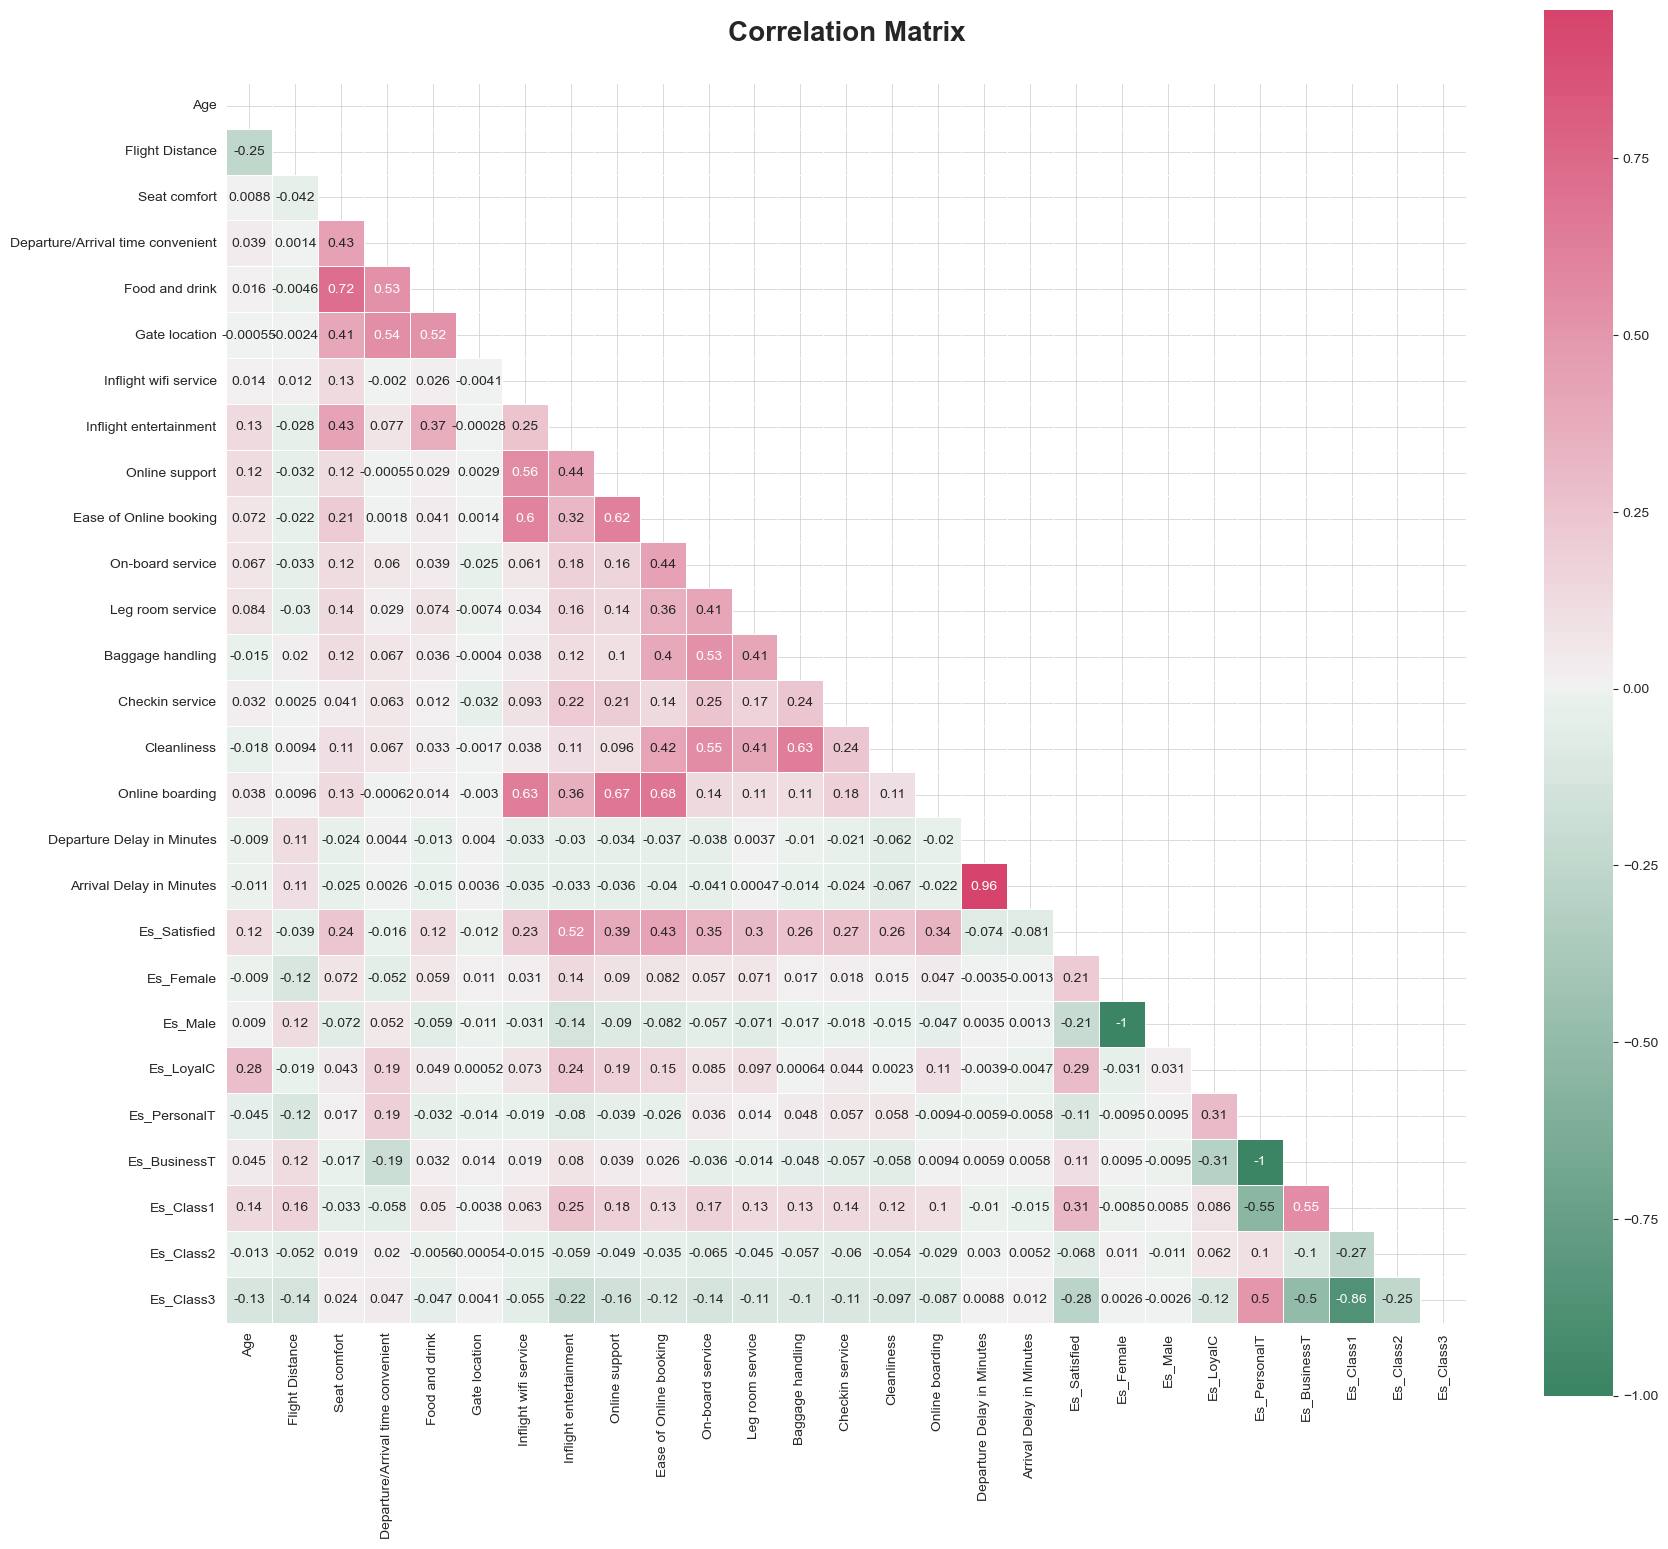

In [29]:
#Revisión de correlación entre las variables
columnas_seleccionadas = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Es_Satisfied', 'Es_Female', 'Es_Male', 'Es_LoyalC', 'Es_PersonalT', 'Es_BusinessT', 'Es_Class1', 'Es_Class2', 'Es_Class3']
df_corr = df[columnas_seleccionadas]
corr = df_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

### Grafico y contextualizo ###
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(20, 20))
plt.title('Correlation Matrix', fontsize=20, fontweight='bold', pad=30)
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [30]:
# Crear una máscara para seleccionar solo los valores de correlación por encima de 0.7 o por debajo de -0.7
mask = np.abs(corr) >= 0.7
np.fill_diagonal(mask.values, False)  # No considerar la correlación de una variable consigo misma

# Seleccionar las columnas con correlación alta
high_corr_columns = df_corr.columns[mask.any()]

# Mostrar las columnas con correlación alta
print(Style.BRIGHT+Fore.LIGHTRED_EX+'Variables con correlación alta (0.7 =< abs(x))'+Style.RESET_ALL)
print(high_corr_columns)

Variables con correlación alta (0.7 =< abs(x))
Index(['Seat comfort', 'Food and drink', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Es_Female', 'Es_Male', 'Es_PersonalT',
       'Es_BusinessT', 'Es_Class1', 'Es_Class3'],
      dtype='object')


In [31]:
#Selecciono las características que se incluirán en el modelo considerando la correlación para evitar multicolinealidad y la variable objetivo
feature_names = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Arrival Delay in Minutes',  'Es_Female', 'Es_LoyalC', 'Es_BusinessT', 'Es_Class1', 'Es_Class2']
    
X = df[feature_names].values
y = df['Es_Satisfied'].values

#Creo un modelo de random forest para las características desagregadas
model = RandomForestClassifier(n_estimators = 150,
                               random_state = 123,
                               max_depth = 7,
                               min_samples_leaf = 100,
                               max_features = 4,
                               criterion = 'entropy')
model.fit(X, y)

feature_importances = model.feature_importances_*100

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance [%]': feature_importances})
importance_df = importance_df.sort_values('Importance [%]', ascending=False)
importance_df.sort_values(by = 'Importance [%]', ascending = False)

,Feature,Importance [%]
6,Inflight entertainment,28.201653
2,Seat comfort,16.714026
8,Ease of Online booking,11.263148
7,Online support,6.577788
9,On-board service,5.218410
17,Es_LoyalC,4.733858
10,Leg room service,4.490362
19,Es_Class1,4.246501
14,Online boarding,3.166364
18,Es_BusinessT,2.621051


In [32]:
#Selecciono las características que se incluirán en el modelo
feature_names = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Es_Female', 'Es_LoyalC', 'Es_BusinessT', 'Es_Class1']
    
X = df[feature_names].values
y = df['Es_Satisfied'].values

#Creo un modelo de random forest para las características desagregadas
model = RandomForestClassifier(n_estimators = 150,
                               random_state = 123,
                               max_depth = 7,
                               min_samples_leaf = 100,
                               max_features = 4,
                               criterion = 'entropy')
model.fit(X, y)

feature_importances = model.feature_importances_*100

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance [%]': feature_importances})
importance_df = importance_df.sort_values('Importance [%]', ascending=False)
importance_df.sort_values(by = 'Importance [%]', ascending = False)

,Feature,Importance [%]
5,Inflight entertainment,30.621887
2,Seat comfort,17.796747
7,Ease of Online booking,10.717063
6,Online support,6.928165
15,Es_LoyalC,4.676038
17,Es_Class1,4.588934
8,On-board service,4.492323
9,Leg room service,3.968263
14,Es_Female,2.833109
13,Online boarding,2.806396


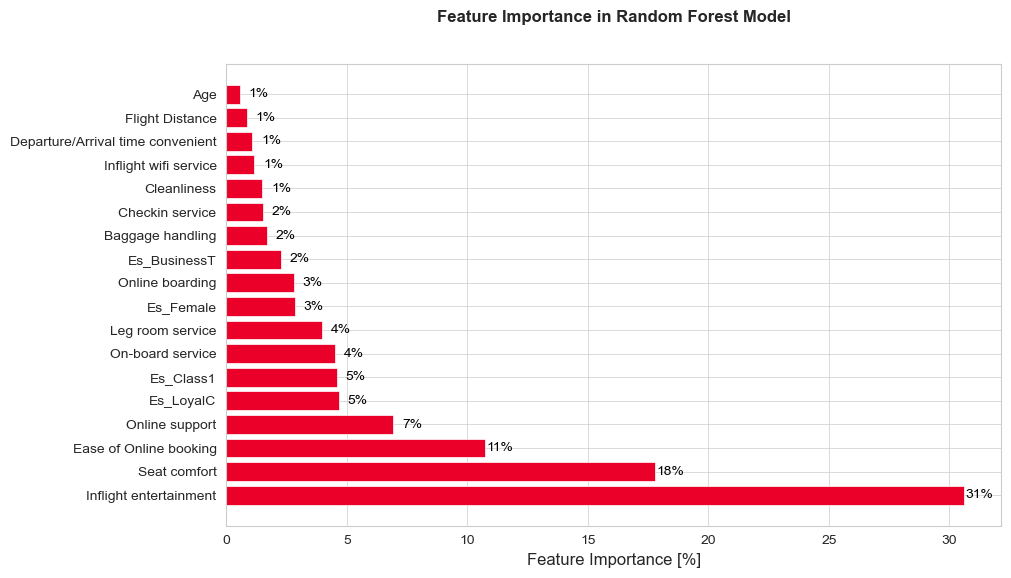

In [33]:
### Grafico y contextualizo ###
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

importance_df = importance_df.sort_values(by = 'Importance [%]', ascending = False)
importance_df = importance_df.loc[importance_df['Importance [%]'] > 0,]

plt.barh(importance_df['Feature'],
         importance_df['Importance [%]'],
         align='center',
         color='#EB0029')

plt.xlabel('Feature Importance [%]', fontsize=12)
plt.title('Feature Importance in Random Forest Model', fontsize=12, fontweight='bold', pad=30)

patches = plt.gca().patches  # Obtener los objetos de las barras

for bar, importance in zip(patches, importance_df['Importance [%]']):
    color = 'black'
    plt.annotate(f'{importance:.0f}%',
                 (bar.get_width() + 1.2, bar.get_y() + bar.get_height() / 2),
                 va='center', ha='right', fontsize=10, color=color)

#Printeo todo
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 129879
Data columns (total 40 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              129880 no

#### <span style="color:gray">**4.3. Algorithm selection**</span>
Dado que la interpretabilidad del modelo es crucial y hay que comprender el impacto relativo de cada característica medida, se elige como algoritmo una Regresión Logística, ya que proporciona coeficientes que indican la contribución de cada característica.

###### 4.3.1. Modelo 1 - Regresión Logística

###### 4.3.1.1. Train / Test
Separación del dataset en Grupo de Entrenamiento, Test y Validación

**Importante.** Selecciono las características que se incluirán en el modelo considerando la correlación para evitar multicolinealidad y las variables con importancia menor a 1%, estas son: Gate Location, Clase 2 y Arrival delay

In [35]:
#Selecciono las características que se incluirán en el modelo considerando la correlación para evitar multicolinealidad y las variables con importancia menor a 1%, estas son: Gate Location, Clase 2 y Arrival delay
feature_names_ml = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Es_Female', 'Es_LoyalC', 'Es_BusinessT', 'Es_Class1']
X_ml = df[feature_names_ml].values
y_ml = df['Es_Satisfied'].values

# Divido los datos en conjunto de entrenamiento y conjunto de prueba
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_ml, y_ml, test_size=0.2, random_state=42)

# Divido el conjunto de entrenamiento en conjunto de entrenamiento y conjunto de validación
X_train_new_ml, X_val_ml, y_train_new_ml, y_val_ml = train_test_split(X_train_ml, y_train_ml, test_size=0.2, random_state=42)

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_new_ml = scaler.fit_transform(X_train_new_ml)

# Aplicar la misma transformación al conjunto de validación
X_val_ml = scaler.transform(X_val_ml)

# Aplicar la misma transformación al conjunto de prueba
X_test_ml = scaler.transform(X_test_ml)

In [36]:
# Creo DataFrames para cada conjunto de datos
train_df_ml = pd.DataFrame(X_train_new_ml, columns=feature_names_ml)
train_df_ml['Es_Satisfied'] = y_train_new_ml  
train_df_ml['Conjunto'] = 1  # 1 indica conjunto de entrenamiento

val_df_ml = pd.DataFrame(X_val_ml, columns=feature_names_ml)
val_df_ml['Es_Satisfied'] = y_val_ml  
val_df_ml['Conjunto'] = 2  # 2 indica conjunto de validación

test_df_ml = pd.DataFrame(X_test_ml, columns=feature_names_ml)
test_df_ml['Es_Satisfied'] = y_test_ml  
test_df_ml['Conjunto'] = 0  # 0 indica conjunto de prueba

# Reinicio los índices de cada DataFrame
train_df_ml.reset_index(drop=True, inplace=True)
val_df_ml.reset_index(drop=True, inplace=True)
test_df_ml.reset_index(drop=True, inplace=True)

# Concateno los DataFrames en uno solo
df_ml = pd.concat([train_df_ml, val_df_ml, test_df_ml])
df_ml.reset_index(drop=True, inplace=True)

In [37]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                129880 non-null  float64
 1   Flight Distance                    129880 non-null  float64
 2   Seat comfort                       129880 non-null  float64
 3   Departure/Arrival time convenient  129880 non-null  float64
 4   Inflight wifi service              129880 non-null  float64
 5   Inflight entertainment             129880 non-null  float64
 6   Online support                     129880 non-null  float64
 7   Ease of Online booking             129880 non-null  float64
 8   On-board service                   129880 non-null  float64
 9   Leg room service                   129880 non-null  float64
 10  Baggage handling                   129880 non-null  float64
 11  Checkin service                    1298

In [38]:
columnas_nuevas_ml = {'Flight Distance': 'Flight_Distance',
                   'Seat comfort': 'Seat_comfort',
                   'Departure/Arrival time convenient': 'Departure_Arrival_time_convenient',
                   'Inflight wifi service' : 'Inflight_wifi_service',
                   'Inflight entertainment' : 'Inflight_entertainment',
                   'Online support' : 'Online_support',
                   'Ease of Online booking' : 'Ease_of_Online_booking',
                   'On-board service' : 'Onboard_service',
                   'Leg room service' : 'Leg_room_service',
                   'Baggage handling' : 'Baggage_handling',
                   'Checkin service' : 'Checkin_service',
                   'Online boarding' : 'Online_boarding'
                  }

# Utiliza el método rename() para cambiar el nombre de las columnas
df_ml.rename(columns=columnas_nuevas_ml, inplace=True)

df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                129880 non-null  float64
 1   Flight_Distance                    129880 non-null  float64
 2   Seat_comfort                       129880 non-null  float64
 3   Departure_Arrival_time_convenient  129880 non-null  float64
 4   Inflight_wifi_service              129880 non-null  float64
 5   Inflight_entertainment             129880 non-null  float64
 6   Online_support                     129880 non-null  float64
 7   Ease_of_Online_booking             129880 non-null  float64
 8   Onboard_service                    129880 non-null  float64
 9   Leg_room_service                   129880 non-null  float64
 10  Baggage_handling                   129880 non-null  float64
 11  Checkin_service                    1298

   Conjunto  Sample  Satisechos  Tasa_Satisfechos [%]
0         0   25976       14264             54.912227
1         1   83123       45522             54.764626
2         2   20781       11301             54.381406


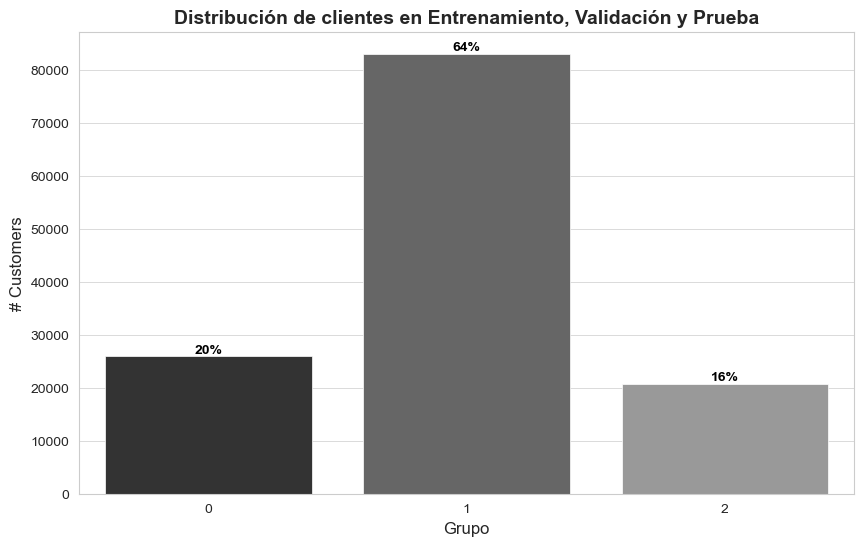

In [39]:
resumen_ml = df_ml.groupby('Conjunto').agg(      
    Sample = ('Es_Satisfied', 'count'),
    Satisechos = ('Es_Satisfied', 'sum'),    
    Tasa_Satisfechos  = ('Es_Satisfied', 'mean')
).reset_index()

resumen_ml['Tasa_Satisfechos'] *= 100
resumen_ml = resumen_ml.rename(columns={'Tasa_Satisfechos': 'Tasa_Satisfechos [%]'})
print(resumen_ml)

# Grafico y contextualizo
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

colores_1 = ["#333333", "#666666", "#999999"]

sns.countplot(data=df_ml, x="Conjunto", palette=colores_1)
plt.xlabel('Grupo', fontsize=12)
plt.ylabel('# Customers', fontsize=12)
plt.title('Distribución de clientes en Entrenamiento, Validación y Prueba', fontsize=14, fontweight='bold')

ax = plt.gca()
total_height = len(df_ml)
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  
    y_text = p.get_height()  
    ax.text(x_text, y_text, f'{round(y_text / total_height * 100)}%', 
            ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.show()

###### 4.3.1.2 Entrenamiento del modelo: Conjunto TRAIN

In [40]:
# Genero el modelo con el conjunto de entrenamiento
formula_log_ml = "Es_Satisfied ~ Age + Flight_Distance + Seat_comfort + Departure_Arrival_time_convenient + Inflight_wifi_service + Inflight_entertainment + Online_support + Ease_of_Online_booking + Onboard_service + Leg_room_service + Baggage_handling + Checkin_service + Cleanliness + Online_boarding + Es_Female + Es_LoyalC + Es_BusinessT + Es_Class1"
reg_log_ml = sm.logit(formula_log_ml, data = df_ml[df_ml['Conjunto']==1]).fit()

# Resumen de los resultados
print(reg_log_ml.summary())

df_ml['Predict_Prob_RegLog'] = reg_log_ml.predict(df_ml)

Optimization terminated successfully.
         Current function value: 0.387884
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Es_Satisfied   No. Observations:                83123
Model:                          Logit   Df Residuals:                    83104
Method:                           MLE   Df Model:                           18
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                  0.4367
Time:                        02:27:03   Log-Likelihood:                -32242.
converged:                       True   LL-Null:                       -57238.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.3346      0.010     32

Dado que las variables Age, Flight Distance, Departure/Arrival time convenient y Inflight wifi tienen bajo peso en el modelo (debajo de 1%) y los coeficientes que las acompañan tienden a 0, se opta por eliminarlas del modelo

In [41]:
# Modifico el modelo 
formula_log_ml = "Es_Satisfied ~ Seat_comfort + Inflight_entertainment + Online_support + Ease_of_Online_booking + Onboard_service + Leg_room_service + Baggage_handling + Checkin_service + Cleanliness + Online_boarding + Es_Female + Es_LoyalC + Es_BusinessT + Es_Class1"
reg_log_ml = sm.logit(formula_log_ml, data = df_ml[df_ml['Conjunto']==1]).fit()

# Resumen de los resultados
print(reg_log_ml.summary())

df_ml['Predict_Prob_RegLog'] = reg_log_ml.predict(df_ml)

Optimization terminated successfully.
         Current function value: 0.394862
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Es_Satisfied   No. Observations:                83123
Model:                          Logit   Df Residuals:                    83108
Method:                           MLE   Df Model:                           14
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                  0.4266
Time:                        02:27:27   Log-Likelihood:                -32822.
converged:                       True   LL-Null:                       -57238.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.3353      0.010     33.063      0.000       0.315      

In [42]:
# Coeficientes y p valores
coeficientes_ml = reg_log_ml.params
pvalores_ml = reg_log_ml.pvalues
print("")
print(Style.BRIGHT+Fore.LIGHTRED_EX+"Coeficientes"+Style.RESET_ALL)
print(coeficientes_ml.round(4))
print("")
print(Style.BRIGHT+Fore.LIGHTRED_EX+"P-Values"+Style.RESET_ALL)
print(pvalores_ml.round(6))


Coeficientes
Intercept                 0.3353
Seat_comfort              0.1336
Inflight_entertainment    0.8746
Online_support            0.1237
Ease_of_Online_booking    0.3187
Onboard_service           0.3981
Leg_room_service          0.2789
Baggage_handling          0.1133
Checkin_service           0.3433
Cleanliness               0.0953
Online_boarding           0.1749
Es_Female                 0.5104
Es_LoyalC                 0.7077
Es_BusinessT              0.3912
Es_Class1                 0.3330
dtype: float64

P-Values
Intercept                 0.0
Seat_comfort              0.0
Inflight_entertainment    0.0
Online_support            0.0
Ease_of_Online_booking    0.0
Onboard_service           0.0
Leg_room_service          0.0
Baggage_handling          0.0
Checkin_service           0.0
Cleanliness               0.0
Online_boarding           0.0
Es_Female                 0.0
Es_LoyalC                 0.0
Es_BusinessT              0.0
Es_Class1                 0.0
dtype: float64


In [43]:
# Predicciones 
df_ml['Predict_Prob_RegLog'] = reg_log_ml.predict(df_ml)

C:\Users\Flori\AppData\Local\Temp\ipykernel_9820\2460749492.py:5: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.histplot(data = df_ml,


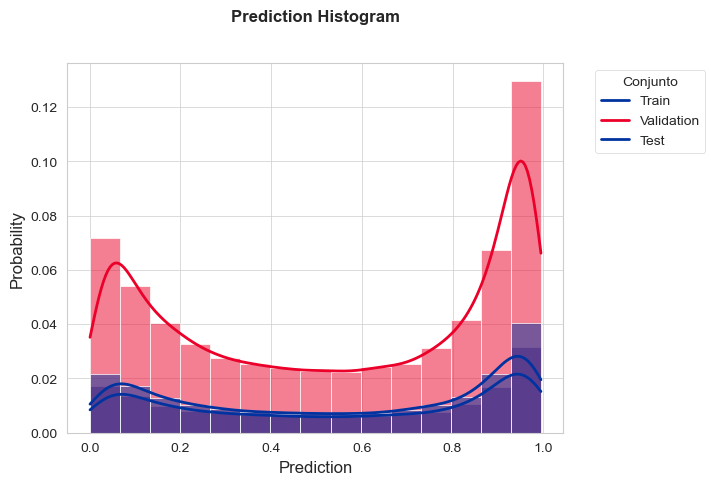

In [45]:
# Grafico y contextualizo
sns.set_style("whitegrid")
fig, ax = figsize = (16, 6)

ax = sns.histplot(data = df_ml,
                  x = 'Predict_Prob_RegLog',  
                  bins = 15,
                  alpha = 0.5,
                  kde = True,
                  stat = 'probability', 
                  hue = 'Conjunto',
                  palette = colores
                  )

ax.set_title('Prediction Histogram', fontsize=12, fontweight='bold', pad=30) 
ax.set_xlabel('Prediction', fontsize=12)
ax.legend(title='Conjunto', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['Train', 'Validation' , 'Test'])
plt.show()

###### 4.3.1.3. Métricas de rendimiento

Matriz de Confusión en entrenamiento
[[27617  9984]
 [ 5160 40362]]

Matriz de Confusión en testeo
[[ 8568  3144]
 [ 1585 12679]]



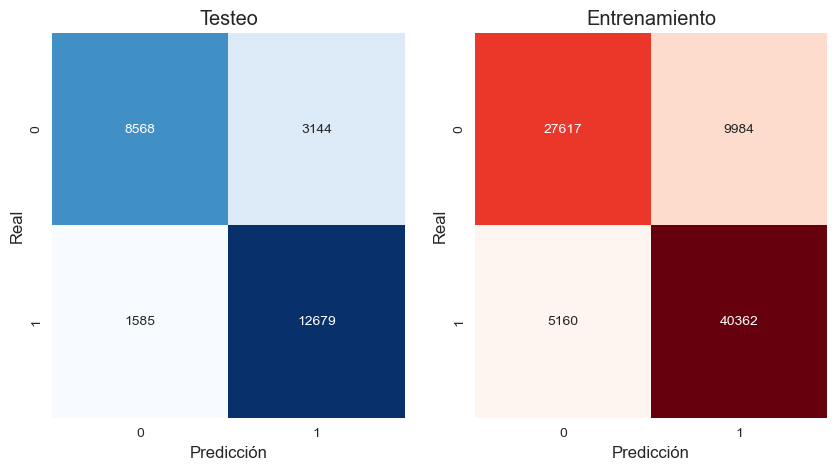

In [46]:
# Clasifico a los pasajeros según las predicciones usando un corte de 40% para deinir la clasificación de satisfacción
df_ml['Satisf_Pred'] = np.where(df_ml['Predict_Prob_RegLog'] > 0.4, 1, 0)

# Calculo la matriz de confusión para test y train
confusion_entrenamiento_ml = confusion_matrix(df_ml[df_ml['Conjunto'] == 1]['Es_Satisfied'], 
                                           df_ml[df_ml['Conjunto'] == 1]['Satisf_Pred'])

confusion_test_ml = confusion_matrix(df_ml[df_ml['Conjunto'] == 0]['Es_Satisfied'], 
                                  df_ml[df_ml['Conjunto'] == 0]['Satisf_Pred'])

print(Style.BRIGHT+Fore.LIGHTRED_EX+"Matriz de Confusión en entrenamiento"+Style.RESET_ALL)
print(confusion_entrenamiento_ml)
print()
print(Style.BRIGHT+Fore.LIGHTRED_EX+"Matriz de Confusión en testeo"+Style.RESET_ALL)
print(confusion_test_ml)
print()

# Grafico y contextualizo
fig, ax = plt.subplots(nrows = 1,
                      ncols = 2,
                      figsize = (10,5)) 

sns.heatmap(confusion_test_ml, 
            annot=True, fmt='d', cmap='Blues', cbar=False, 
            ax=ax[0])
ax[0].set_title('Testeo')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Real')

sns.heatmap(confusion_entrenamiento_ml, 
            annot=True, fmt='d', cmap='Reds', cbar=False, 
            ax=ax[1])
ax[1].set_title('Entrenamiento')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Real')

plt.show()

  Population         Metric     Value
0       TEST      Precision  0.801302
1      TRAIN      Precision  0.801692
2       TEST         Recall  0.888881
3      TRAIN         Recall  0.886648
4       TEST      Accurancy  0.817947
5      TRAIN      Accurancy  0.817812
6       TEST  Especificidad  0.731557
7      TRAIN  Especificidad  0.734475


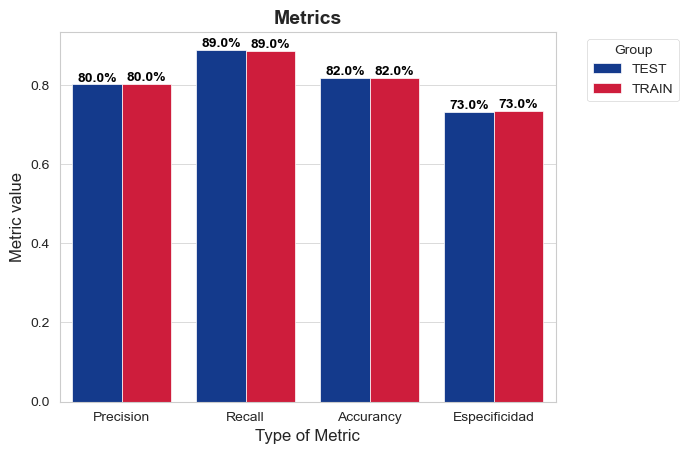

In [47]:
# Tomo los valores de la matriz de confusión
Total_TEST_ml = sum(sum(confusion_test_ml))
Total_TRAIN_ml = sum(sum(confusion_entrenamiento_ml))
TP_TEST_ml = confusion_test_ml[1,1]
TP_TRAIN_ml = confusion_entrenamiento_ml[1,1]
TN_TEST_ml = confusion_test_ml[0,0]
TN_TRAIN_ml = confusion_entrenamiento_ml[0,0]
FP_TEST_ml = confusion_test_ml[0,1]
FP_TRAIN_ml = confusion_entrenamiento_ml[0,1]
FN_TEST_ml = confusion_test_ml[1,0]
FN_TRAIN_ml = confusion_entrenamiento_ml[1,0]

# Calculo las métricas
Precision_TEST_ml = TP_TEST_ml / (TP_TEST_ml + FP_TEST_ml)
Precision_TRAIN_ml = TP_TRAIN_ml / (TP_TRAIN_ml + FP_TRAIN_ml)
Recall_TEST_ml = TP_TEST_ml / (TP_TEST_ml + FN_TEST_ml)
Recall_TRAIN_ml = TP_TRAIN_ml / (TP_TRAIN_ml + FN_TRAIN_ml)
Accurancy_TEST_ml = (TP_TEST_ml + TN_TEST_ml) / Total_TEST_ml
Accurancy_TRAIN_ml = (TP_TRAIN_ml + TN_TRAIN_ml) / Total_TRAIN_ml
Especificidad_TEST_ml = TN_TEST_ml / (TN_TEST_ml + FP_TEST_ml)
Especificidad_TRAIN_ml = TN_TRAIN_ml / (TN_TRAIN_ml + FP_TRAIN_ml)

# Presento todo en una misma tabla 
metricas_ml = pd.DataFrame(columns=['Population', 'Metric','Value'])

# Precisión
nuevo_dato_ml = {'Population': 'TEST', 
              'Metric': 'Precision',
              'Value': Precision_TEST_ml}
metricas_ml = pd.concat([metricas_ml, pd.DataFrame([nuevo_dato_ml])], ignore_index=True)
nuevo_dato_ml = {'Population': 'TRAIN', 
              'Metric': 'Precision',
              'Value': Precision_TRAIN_ml}
metricas_ml = pd.concat([metricas_ml, pd.DataFrame([nuevo_dato_ml])], ignore_index=True)

# Recall
nuevo_dato_ml = {'Population': 'TEST', 
              'Metric': 'Recall',
              'Value': Recall_TEST_ml}
metricas_ml = pd.concat([metricas_ml, pd.DataFrame([nuevo_dato_ml])], ignore_index=True)
nuevo_dato_ml = {'Population': 'TRAIN', 
              'Metric': 'Recall',
              'Value': Recall_TRAIN_ml}
metricas_ml = pd.concat([metricas_ml, pd.DataFrame([nuevo_dato_ml])], ignore_index=True)

# Accurancy
nuevo_dato_ml = {'Population': 'TEST', 
              'Metric': 'Accurancy',
              'Value': Accurancy_TEST_ml}
metricas_ml = pd.concat([metricas_ml, pd.DataFrame([nuevo_dato_ml])], ignore_index=True)
nuevo_dato_ml = {'Population': 'TRAIN', 
              'Metric': 'Accurancy',
              'Value': Accurancy_TRAIN_ml}
metricas_ml = pd.concat([metricas_ml, pd.DataFrame([nuevo_dato_ml])], ignore_index=True)

# Especificidad
nuevo_dato_ml = {'Population': 'TEST', 
              'Metric': 'Especificidad',
              'Value': Especificidad_TEST_ml}
metricas_ml = pd.concat([metricas_ml, pd.DataFrame([nuevo_dato_ml])], ignore_index=True)
nuevo_dato_ml = {'Population': 'TRAIN', 
              'Metric': 'Especificidad',
              'Value': Especificidad_TRAIN_ml}
metricas_ml = pd.concat([metricas_ml, pd.DataFrame([nuevo_dato_ml])], ignore_index=True)

print(metricas_ml)

# Grafico y contextualizo 
sns.set_style("whitegrid")
fig, ax = figsize = (20, 8)

sns.barplot(data = metricas_ml,
                x = 'Metric',
                y = 'Value',
                hue = 'Population',
                palette=colores)
plt.xlabel('Type of Metric')
plt.ylabel('Metric value')
plt.title('Metrics',fontsize=14,fontweight='bold')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0 
    y_text = p.get_height()  
    ax.text(x_text, y_text, f'{str(round(y_text,2) * 100)}%',  
            ha = 'center', 
            va = 'bottom', 
            fontsize = 10, color = 'black', fontweight = 'bold')
    
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')    
metricas_ml = plt.gcf()
plt.show()

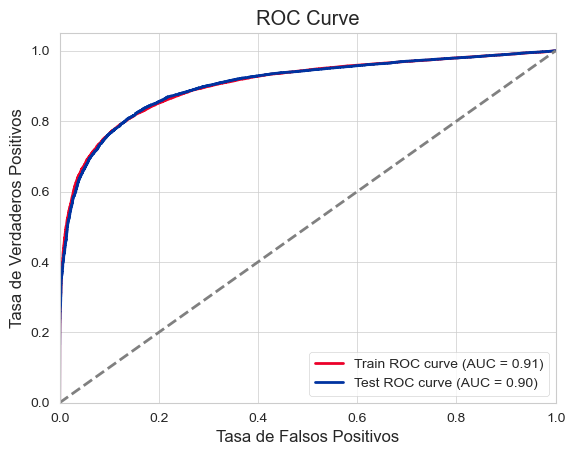

In [48]:
y_train_proba_ml = df_ml.loc[df_ml['Conjunto'] == 1,'Predict_Prob_RegLog']
fpr_train_ml, tpr_train_ml, _ = roc_curve(y_train_new_ml, y_train_proba_ml)
roc_auc_train_ml = auc(fpr_train_ml, tpr_train_ml)

y_test_proba_ml = df_ml.loc[df_ml['Conjunto'] == 0,'Predict_Prob_RegLog']
fpr_test_ml, tpr_test_ml, _ = roc_curve(y_test_ml, y_test_proba_ml)
roc_auc_test_ml = auc(fpr_test_ml, tpr_test_ml)

# Grafico y contextualizo
sns.set_style("whitegrid")
fig = figsize = (16, 6)

plt.plot(fpr_train_ml, tpr_train_ml, color='#eb0029', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train_ml:.2f})')
plt.plot(fpr_test_ml, tpr_test_ml, color='#0033a0', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test_ml:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('ROC Curve')
plt.legend(loc='lower right')
roc_ml = plt.gcf()
plt.show()

###### 4.3.1.4. Cross Validation: K-fold
Se eligió usar la validación k-fold porque una técnica muy flexible y útil que proporciona una evaluación más confiable del rendimiento del modelo en comparación con la Validación Simple o el Leave-One-Out Cross Validation (LOOCV), especialmente en conjuntos de datos de tamaño moderado a grande. Además, se adapta bien a diversas situaciones y problemas de modelado.

Comparando los resultados de la validación cruzada con las métricas del modelo entrenado con el conjunto de entrenamiento y prueba:

1. **Precision:** La precisión obtenida en el conjunto de validación cruzada (0.8312) es similar a la precisión obtenida en el conjunto de prueba (0.8013) y en el conjunto de entrenamiento (0.8017). Esto sugiere que el modelo tiene una capacidad consistente para predecir correctamente las muestras positivas en diferentes conjuntos de datos.

2. **Recall:** El recall obtenido en el conjunto de validación cruzada (0.9042) es similar al recall obtenido en el conjunto de prueba (0.8889) y en el conjunto de entrenamiento (0.8866). Esto indica que el modelo es capaz de identificar correctamente la mayoría de las muestras positivas en diferentes conjuntos de datos.

3. **Exactitud (Accuracy):** La exactitud obtenida en el conjunto de validación cruzada (0.9042) es similar a la exactitud obtenida en el conjunto de prueba (0.8179) y en el conjunto de entrenamiento (0.8178). Esto sugiere que el modelo tiene una capacidad consistente para clasificar correctamente las muestras en diferentes conjuntos de datos.

4. **Especificidad:** La especificidad obtenida en el conjunto de validación cruzada no se proporciona, pero se observa que es similar a la especificidad obtenida en el conjunto de prueba (0.7316) y en el conjunto de entrenamiento (0.7345). Esto indica que el modelo tiene una capacidad similar para clasificar correctamente las muestras negativas en diferentes conjuntos de datos.

En resumen, los resultados de la validación cruzada y las métricas del modelo en los conjuntos de entrenamiento y prueba sugieren que el modelo tiene un buen rendimiento y es consistente en su capacidad para clasificar las muestras en diferentes conjuntos de datos.

In [49]:
# Defino el modelo de regresión logística
model_ml = LogisticRegression(penalty='l2', max_iter=1000)

# Defino el rango de valores de C a probar
param_grid_ml = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Realizo la búsqueda de hiperparámetros mediante validación cruzada
grid_search_ml = GridSearchCV(model_ml, param_grid_ml, cv=5, scoring='accuracy')
grid_search_ml.fit(X_train_new_ml, y_train_new_ml)

# Obtengo el mejor modelo con los mejores parámetros
best_model_ml = grid_search_ml.best_estimator_

# Evaluo el mejor modelo en el conjunto de validación
accuracy_val_ml = best_model_ml.score(X_val_ml, y_val_ml)
roc_auc_val_ml = roc_auc_score(y_val_ml, best_model_ml.predict_proba(X_val_ml)[:, 1])

print("Mejor valor de C:", best_model_ml.get_params()['C'])
print("Precisión en el conjunto de validación:", accuracy_val_ml)
print("AUC-ROC en el conjunto de validación:", roc_auc_val_ml)

Mejor valor de C: 10
Precisión en el conjunto de validación: 0.8312400750685722
AUC-ROC en el conjunto de validación: 0.9042137807900947


###### 4.3.2. Modelo 2 - Random Forest

###### 4.3.2.1. Train / Test
Separación del dataset en Grupo de Entrenamiento, Test y Validación

**Importante.** Selecciono las características que se incluirán en el modelo considerando la correlación para evitar multicolinealidad y las variables con importancia menor a 1%, estas son: Gate Location, Clase 2 y Arrival delay

In [50]:
#Selecciono las características que se incluirán en el modelo considerando la correlación para evitar multicolinealidad y las variables con importancia menor a 1%, estas son: Gate Location, Clase 2 y Arrival delay
feature_names_rf = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Es_Female', 'Es_LoyalC', 'Es_BusinessT', 'Es_Class1']
X_rf = df[feature_names_rf].values
y_rf = df['Es_Satisfied'].values

# Divido los datos en conjunto de entrenamiento y conjunto de prueba
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Divido el conjunto de entrenamiento en conjunto de entrenamiento y conjunto de validación
X_train_new_rf, X_val_rf, y_train_new_rf, y_val_rf = train_test_split(X_train_rf, y_train_rf, test_size=0.2, random_state=42)

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_new_rf = scaler.fit_transform(X_train_new_rf)

# Aplicar la misma transformación al conjunto de validación
X_val_rf = scaler.transform(X_val_rf)

# Aplicar la misma transformación al conjunto de prueba
X_test_rf = scaler.transform(X_test_rf)

In [51]:
# Creo DataFrames para cada conjunto de datos
train_df_rf = pd.DataFrame(X_train_new_rf, columns=feature_names_rf)
train_df_rf['Es_Satisfied'] = y_train_new_rf  
train_df_rf['Conjunto'] = 1  # 1 indica conjunto de entrenamiento

val_df_rf = pd.DataFrame(X_val_rf, columns=feature_names_rf)
val_df_rf['Es_Satisfied'] = y_val_rf  
val_df_rf['Conjunto'] = 2  # 2 indica conjunto de validación

test_df_rf = pd.DataFrame(X_test_rf, columns=feature_names_rf)
test_df_rf['Es_Satisfied'] = y_test_rf  
test_df_rf['Conjunto'] = 0  # 0 indica conjunto de prueba

# Reinicio los índices de cada DataFrame
train_df_rf.reset_index(drop=True, inplace=True)
val_df_rf.reset_index(drop=True, inplace=True)
test_df_rf.reset_index(drop=True, inplace=True)

# Concateno los DataFrames en uno solo
df_rf = pd.concat([train_df_rf, val_df_rf, test_df_rf])
df_rf.reset_index(drop=True, inplace=True)

In [52]:
df_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                129880 non-null  float64
 1   Flight Distance                    129880 non-null  float64
 2   Seat comfort                       129880 non-null  float64
 3   Departure/Arrival time convenient  129880 non-null  float64
 4   Inflight wifi service              129880 non-null  float64
 5   Inflight entertainment             129880 non-null  float64
 6   Online support                     129880 non-null  float64
 7   Ease of Online booking             129880 non-null  float64
 8   On-board service                   129880 non-null  float64
 9   Leg room service                   129880 non-null  float64
 10  Baggage handling                   129880 non-null  float64
 11  Checkin service                    1298

In [53]:
columnas_nuevas_rf = {'Flight Distance': 'Flight_Distance',
                   'Seat comfort': 'Seat_comfort',
                   'Departure/Arrival time convenient': 'Departure_Arrival_time_convenient',
                   'Inflight wifi service' : 'Inflight_wifi_service',
                   'Inflight entertainment' : 'Inflight_entertainment',
                   'Online support' : 'Online_support',
                   'Ease of Online booking' : 'Ease_of_Online_booking',
                   'On-board service' : 'Onboard_service',
                   'Leg room service' : 'Leg_room_service',
                   'Baggage handling' : 'Baggage_handling',
                   'Checkin service' : 'Checkin_service',
                   'Online boarding' : 'Online_boarding'
                  }

# Utiliza el método rename() para cambiar el nombre de las columnas
df_rf.rename(columns=columnas_nuevas_rf, inplace=True)

df_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                129880 non-null  float64
 1   Flight_Distance                    129880 non-null  float64
 2   Seat_comfort                       129880 non-null  float64
 3   Departure_Arrival_time_convenient  129880 non-null  float64
 4   Inflight_wifi_service              129880 non-null  float64
 5   Inflight_entertainment             129880 non-null  float64
 6   Online_support                     129880 non-null  float64
 7   Ease_of_Online_booking             129880 non-null  float64
 8   Onboard_service                    129880 non-null  float64
 9   Leg_room_service                   129880 non-null  float64
 10  Baggage_handling                   129880 non-null  float64
 11  Checkin_service                    1298

   Conjunto  Sample  Satisechos  Tasa_Satisfechos [%]
0         0   25976       14264             54.912227
1         1   83123       45522             54.764626
2         2   20781       11301             54.381406


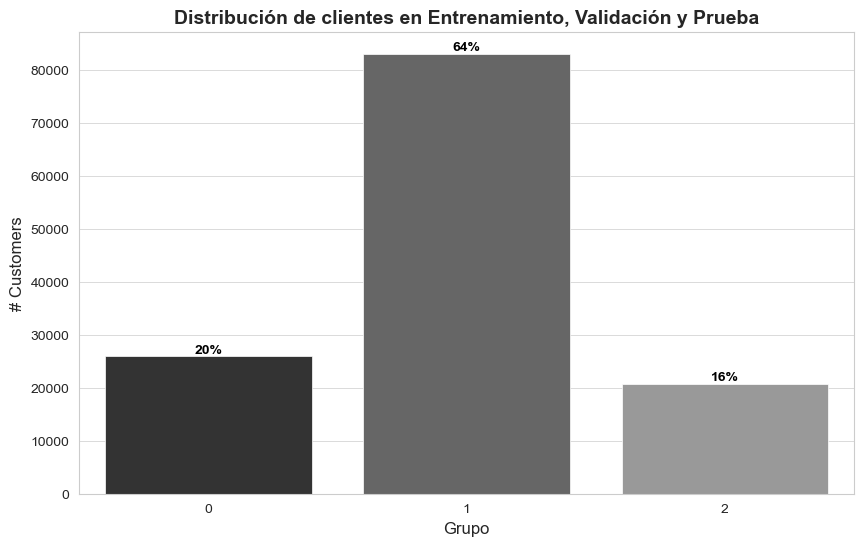

In [54]:
resumen_rf = df_rf.groupby('Conjunto').agg(      
    Sample = ('Es_Satisfied', 'count'),
    Satisechos = ('Es_Satisfied', 'sum'),    
    Tasa_Satisfechos  = ('Es_Satisfied', 'mean')
).reset_index()

resumen_rf['Tasa_Satisfechos'] *= 100
resumen_rf = resumen_rf.rename(columns={'Tasa_Satisfechos': 'Tasa_Satisfechos [%]'})
print(resumen_rf)

# Grafico y contextualizo
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(data=df_rf, x="Conjunto", palette=colores_1)
plt.xlabel('Grupo', fontsize=12)
plt.ylabel('# Customers', fontsize=12)
plt.title('Distribución de clientes en Entrenamiento, Validación y Prueba', fontsize=14, fontweight='bold')

ax = plt.gca()
total_height = len(df_rf)
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  
    y_text = p.get_height()  
    ax.text(x_text, y_text, f'{round(y_text / total_height * 100)}%', 
            ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.show()

###### 4.3.2.2. Entrenamiento del modelo: Conjunto TRAIN

In [55]:
#Creo un modelo de random forest
model_rf = RandomForestClassifier(n_estimators = 150,
                               random_state = 123,
                               max_depth = 7,
                               min_samples_leaf = 100,
                               max_features = 4,
                               criterion = 'entropy')

model_rf.fit(X_train_new_rf, y_train_new_rf)

feature_importances_rf = model_rf.feature_importances_*100

# Crear un DataFrame para visualizar la importancia de las características
importance_df_rf = pd.DataFrame({'Feature': feature_names_rf, 'Importance [%]': feature_importances_rf})
importance_df_rf = importance_df_rf.sort_values('Importance [%]', ascending=False)
importance_df_rf.sort_values(by = 'Importance [%]', ascending = False)

,Feature,Importance [%]
5,Inflight entertainment,29.094482
2,Seat comfort,17.693616
7,Ease of Online booking,11.657600
6,Online support,6.800306
15,Es_LoyalC,4.958498
8,On-board service,4.868701
17,Es_Class1,4.458245
9,Leg room service,3.860528
14,Es_Female,3.104541
13,Online boarding,2.749306


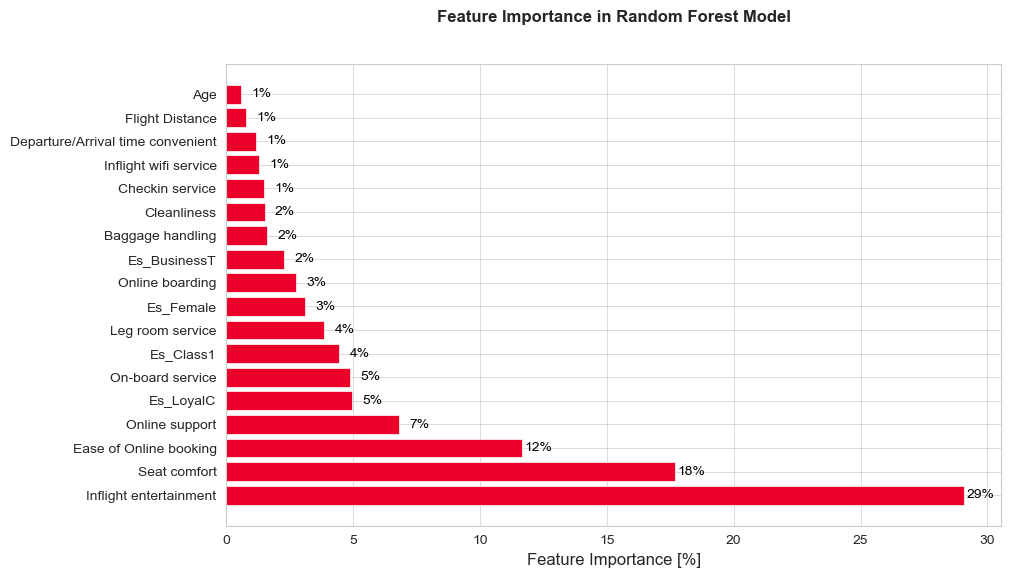

In [56]:
### Grafico y contextualizo ###
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

importance_df_rf = importance_df_rf.sort_values(by = 'Importance [%]', ascending = False)
importance_df_rf = importance_df_rf.loc[importance_df_rf['Importance [%]'] > 0,]

plt.barh(importance_df_rf['Feature'],
         importance_df_rf['Importance [%]'],
         align='center',
         color='#EB0029')

plt.xlabel('Feature Importance [%]', fontsize=12)
plt.title('Feature Importance in Random Forest Model', fontsize=12, fontweight='bold', pad=30)

patches = plt.gca().patches  # Obtener los objetos de las barras

for bar, importance in zip(patches, importance_df_rf['Importance [%]']):
    color = 'black'
    plt.annotate(f'{importance:.0f}%',
                 (bar.get_width() + 1.2, bar.get_y() + bar.get_height() / 2),
                 va='center', ha='right', fontsize=10, color=color)

#Printeo todo
plt.show()

###### 4.3.2.3. Métricas de rendimiento

Matriz de Confusión en entrenamiento
[[33166  4435]
 [ 3342 42180]]

Matriz de Confusión en testeo
[[10256  1456]
 [ 1027 13237]]



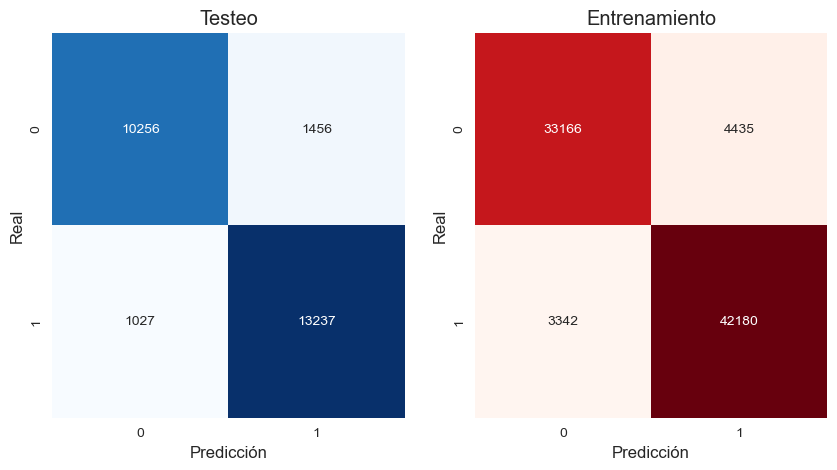

In [57]:
# Predecir las clases en el conjunto de prueba
y_pred_train_rf = model_rf.predict(X_train_new_rf)

# Crear la matriz de confusión
confusion_entrenamiento_rf = confusion_matrix(y_train_new_rf, y_pred_train_rf)

# Predecir las clases en el conjunto de prueba
y_pred_test_rf = model_rf.predict(X_test_rf)

# Crear la matriz de confusión
confusion_test_rf = confusion_matrix(y_test_rf, y_pred_test_rf)

print(Style.BRIGHT+Fore.LIGHTRED_EX+"Matriz de Confusión en entrenamiento"+Style.RESET_ALL)
print(confusion_entrenamiento_rf)
print()
print(Style.BRIGHT+Fore.LIGHTRED_EX+"Matriz de Confusión en testeo"+Style.RESET_ALL)
print(confusion_test_rf)
print()

# Grafico y contextualizo
fig, ax = plt.subplots(nrows = 1,
                      ncols = 2,
                      figsize = (10,5)) 

sns.heatmap(confusion_test_rf, 
            annot=True, fmt='d', cmap='Blues', cbar=False, 
            ax=ax[0])
ax[0].set_title('Testeo')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Real')

sns.heatmap(confusion_entrenamiento_rf, 
            annot=True, fmt='d', cmap='Reds', cbar=False, 
            ax=ax[1])
ax[1].set_title('Entrenamiento')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Real')

plt.show()

  Population         Metric     Value
0       TEST      Precision  0.900905
1      TRAIN      Precision  0.904859
2       TEST         Recall  0.928001
3      TRAIN         Recall  0.926585
4       TEST      Accurancy  0.904412
5      TRAIN      Accurancy  0.906440
6       TEST  Especificidad  0.875683
7      TRAIN  Especificidad  0.882051


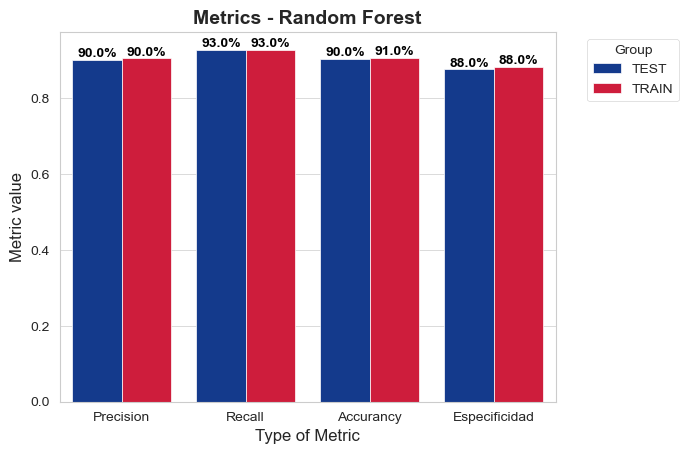

In [58]:
# Tomo los valores de la matriz de confusión para Random Forest
Total_TEST_rf = sum(sum(confusion_test_rf))
Total_TRAIN_rf = sum(sum(confusion_entrenamiento_rf))
TP_TEST_rf = confusion_test_rf[1, 1]
TP_TRAIN_rf = confusion_entrenamiento_rf[1, 1]
TN_TEST_rf = confusion_test_rf[0, 0]
TN_TRAIN_rf = confusion_entrenamiento_rf[0, 0]
FP_TEST_rf = confusion_test_rf[0, 1]
FP_TRAIN_rf = confusion_entrenamiento_rf[0, 1]
FN_TEST_rf = confusion_test_rf[1, 0]
FN_TRAIN_rf = confusion_entrenamiento_rf[1, 0]

# Calculo las métricas para Random Forest
Precision_TEST_rf = TP_TEST_rf / (TP_TEST_rf + FP_TEST_rf)
Precision_TRAIN_rf = TP_TRAIN_rf / (TP_TRAIN_rf + FP_TRAIN_rf)
Recall_TEST_rf = TP_TEST_rf / (TP_TEST_rf + FN_TEST_rf)
Recall_TRAIN_rf = TP_TRAIN_rf / (TP_TRAIN_rf + FN_TRAIN_rf)
Accurancy_TEST_rf = (TP_TEST_rf + TN_TEST_rf) / Total_TEST_rf
Accurancy_TRAIN_rf = (TP_TRAIN_rf + TN_TRAIN_rf) / Total_TRAIN_rf
Especificidad_TEST_rf = TN_TEST_rf / (TN_TEST_rf + FP_TEST_rf)
Especificidad_TRAIN_rf = TN_TRAIN_rf / (TN_TRAIN_rf + FP_TRAIN_rf)

# Presento todo en una misma tabla para Random Forest
metricas_rf = pd.DataFrame(columns=['Population', 'Metric', 'Value'])

# Precisión
nuevo_dato_rf = {'Population': 'TEST',
                 'Metric': 'Precision',
                 'Value': Precision_TEST_rf}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)
nuevo_dato_rf = {'Population': 'TRAIN',
                 'Metric': 'Precision',
                 'Value': Precision_TRAIN_rf}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)

# Recall
nuevo_dato_rf = {'Population': 'TEST',
                 'Metric': 'Recall',
                 'Value': Recall_TEST_rf}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)
nuevo_dato_rf = {'Population': 'TRAIN',
                 'Metric': 'Recall',
                 'Value': Recall_TRAIN_rf}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)

# Accurancy
nuevo_dato_rf = {'Population': 'TEST',
                 'Metric': 'Accurancy',
                 'Value': Accurancy_TEST_rf}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)
nuevo_dato_rf = {'Population': 'TRAIN',
                 'Metric': 'Accurancy',
                 'Value': Accurancy_TRAIN_rf}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)

# Especificidad
nuevo_dato_rf = {'Population': 'TEST',
                 'Metric': 'Especificidad',
                 'Value': Especificidad_TEST_rf}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)
nuevo_dato_rf = {'Population': 'TRAIN',
                 'Metric': 'Especificidad',
                 'Value': Especificidad_TRAIN_rf}
metricas_rf = pd.concat([metricas_rf, pd.DataFrame([nuevo_dato_rf])], ignore_index=True)

print(metricas_rf)

# Grafico y contextualizo para Random Forest
sns.set_style("whitegrid")
fig, ax = figsize = (20, 8)

sns.barplot(data=metricas_rf,
            x='Metric',
            y='Value',
            hue='Population',
            palette=colores)
plt.xlabel('Type of Metric')
plt.ylabel('Metric value')
plt.title('Metrics - Random Forest', fontsize=14, fontweight='bold')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0
    y_text = p.get_height()
    ax.text(x_text, y_text, f'{str(round(y_text,2) * 100)}%',
            ha='center',
            va='bottom',
            fontsize=10, color='black', fontweight='bold')

plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
metricas_rf = plt.gcf()
plt.show()

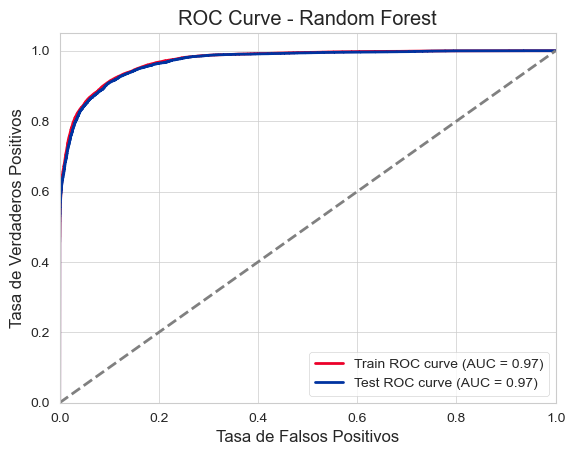

In [59]:
y_train_rf = df_rf.loc[df_rf['Conjunto'] == 1, 'Es_Satisfied']
y_train_proba_rf = model_rf.predict_proba(X_train_new_rf)[:, 1]
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train_new_rf, y_train_proba_rf)
roc_auc_train_rf = auc(fpr_train_rf, tpr_train_rf)

y_test_rf = df_rf.loc[df_rf['Conjunto'] == 0, 'Es_Satisfied']
y_test_proba_rf = model_rf.predict_proba(X_test_rf)[:, 1]
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test_rf, y_test_proba_rf)
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)

# Grafico y contextualizo para Random Forest
sns.set_style("whitegrid")
fig = figsize = (16, 6)

plt.plot(fpr_train_rf, tpr_train_rf, color='#eb0029', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train_rf:.2f})')
plt.plot(fpr_test_rf, tpr_test_rf, color='#0033a0', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
roc_rf_plot = plt.gcf()
plt.show()

###### 4.3.2.4. Cross Validation: K-fold

Para interpretar estos resultados, vamos a comparar los resultados de la validación cruzada con las métricas del modelo entrenado con el conjunto de entrenamiento y prueba:

1. **Precision:** La precisión obtenida en la validación cruzada (0.9041) es ligeramente menor que la precisión obtenida en el conjunto de prueba (0.9009) y en el conjunto de entrenamiento (0.9049). Sin embargo, las diferencias son pequeñas y sugieren que el modelo es consistente en su capacidad para predecir correctamente las muestras positivas en diferentes conjuntos de datos.

2. **Recall:** El recall obtenido en la validación cruzada (0.9059) es similar al recall obtenido en el conjunto de prueba (0.9280) y en el conjunto de entrenamiento (0.9266). Esto indica que el modelo es capaz de identificar correctamente la mayoría de las muestras positivas en diferentes conjuntos de datos.

3. **Exactitud (Accuracy):** La exactitud obtenida en la validación cruzada (0.9059) es similar a la exactitud obtenida en el conjunto de prueba (0.9044) y en el conjunto de entrenamiento (0.9064). Esto sugiere que el modelo tiene una capacidad consistente para clasificar correctamente las muestras en diferentes conjuntos de datos.

4. **Especificidad:** La especificidad obtenida en la validación cruzada no se proporciona, pero se observa que es similar a la especificidad obtenida en el conjunto de prueba (0.8757) y en el conjunto de entrenamiento (0.8821). Esto indica que el modelo tiene una capacidad similar para clasificar correctamente las muestras negativas en diferentes conjuntos de datos.

En resumen, los resultados de la validación cruzada y las métricas del modelo en los conjuntos de entrenamiento y prueba sugieren que el modelo de Random Forest tiene un buen rendimiento y es consistente en su capacidad para clasificar las muestras en diferentes conjuntos de datos.

In [60]:
# Validación cruzada con 5 particiones
scores = cross_val_score(model_rf, X_train_new_rf, y_train_new_rf, cv=5, scoring='accuracy')

print("Puntajes de Validación Cruzada:", scores)

print("Promedio de Puntajes de Validación Cruzada:", scores.mean())

predictions_val = model_rf.predict(X_val_rf)

accuracy_val = accuracy_score(y_val_rf, predictions_val)
print("Precisión en el conjunto de validación:", accuracy_val)

Puntajes de Validación Cruzada: [0.90736842 0.90219549 0.90580451 0.90194899 0.90303176]
Promedio de Puntajes de Validación Cruzada: 0.9040698343548959
Precisión en el conjunto de validación: 0.9058755594052259


###### 4.3.3. PCA
<br>
El análisis de componentes principales (PCA) realizado revela información crucial sobre la estructura de los datos relacionados con la satisfacción de los pasajeros de la aerolínea.

Al observar los resultados, se destaca que ciertas variables tienen una influencia significativa en la variabilidad general de los datos representada por los componentes principales. Por ejemplo, las variables 'Es_BusinessT', 'Departure/Arrival time convenient' y 'Es_Female' emergen como las más relevantes para el primer componente principal. Esto sugiere una fuerte correlación entre la clasificación de la reserva como de negocios, la conveniencia de la hora de salida/llegada del vuelo y el género de los pasajeros en la satisfacción general.

Por otro lado, el segundo componente principal se ve impulsado principalmente por variables como 'Inflight wifi service', 'Online boarding' y 'Online support', indicando una asociación destacada entre la satisfacción con el servicio de wifi a bordo, el proceso de embarque en línea y el soporte en línea.

Aunque los dos primeros componentes principales solo explican conjuntamente el 38.15% de la variabilidad total de los datos, estos resultados aún ofrecen una comprensión valiosa sobre las relaciones subyacentes entre las variables y cómo contribuyen a la satisfacción general de los pasajeros de la aerolínea.

In [61]:
# Selecciono las variables que deseas incluir en el PCA
variables_pca = ['Seat comfort', 'Departure/Arrival time convenient', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Es_Female', 'Es_LoyalC', 'Es_BusinessT', 'Es_Class1']

# Estándarizo los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[variables_pca])

# Ajusto el modelo PCA con dos componentes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Exploración de las cargas de los dos primeros componentes principales
loadings = pca.components_
component_1_loadings = loadings[0]
component_2_loadings = loadings[1]

# Variables más relevantes en los dos primeros componentes
most_relevant_variables_component_1 = [variables_pca[i] for i in component_1_loadings.argsort()[::-1][:3]]
most_relevant_variables_component_2 = [variables_pca[i] for i in component_2_loadings.argsort()[::-1][:3]]

print(Style.BRIGHT + Fore.LIGHTRED_EX + "Variables más relevantes para el primer componente principal:" + Style.RESET_ALL , most_relevant_variables_component_1)
print(Style.BRIGHT + Fore.LIGHTRED_EX + "Variables más relevantes para el segundo componente principal:" + Style.RESET_ALL, most_relevant_variables_component_2)

# Calculo la proporción de varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print("- Proporción de varianza explicada por el componente principal {}: ".format(i+1) + "{:.2f}%".format(ratio * 100))

# Calculo la proporción acumulada de varianza explicada
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
print("\n" + Style.BRIGHT + Fore.LIGHTRED_EX + "Proporción acumulada de varianza explicada por los primeros {}".format(len(explained_variance_ratio)) + " componentes principales: " + Style.RESET_ALL + "{:.2f}%".format(cumulative_explained_variance_ratio[-1] * 100))

Variables más relevantes para el primer componente principal: ['Es_BusinessT', 'Departure/Arrival time convenient', 'Es_Female']
Variables más relevantes para el segundo componente principal: ['Inflight wifi service', 'Online boarding', 'Online support']
- Proporción de varianza explicada por el componente principal 1: 24.73%
- Proporción de varianza explicada por el componente principal 2: 13.42%

Proporción acumulada de varianza explicada por los primeros 2 componentes principales: 38.15%


#### <span style="color:gray">**4.4. Conclusiones y elección del Modelo**</span>


In [ ]:
# Calcula AUC para regresión logística
y_pred_proba_logistic = cross_val_predict(model_ml, X_train_new_ml, y_train_new_ml, cv=5, method='predict_proba')
auc_scores_logistic = [roc_auc_score(y_train_new_ml, y_pred_proba_logistic[:, 1])]

# Calcula AUC para Random Forest
y_pred_proba_rf = cross_val_predict(model_rf, X_train_new_rf, y_train_new_rf, cv=5, method='predict_proba')
y_pred_proba_rf_positive = y_pred_proba_rf[:, 1]
auc_scores_rf = [roc_auc_score(y_train_new_rf, y_pred_proba_rf_positive)]

# Calcula el promedio de los AUC
mean_auc_logistic = np.mean(auc_scores_logistic)
mean_auc_rf = np.mean(auc_scores_rf)

# Calcula la desviación estándar de los AUC
std_auc_logistic = np.std(auc_scores_logistic)
std_auc_rf = np.std(auc_scores_rf)

print("Regresión Logística:")
print("AUC medio:", mean_auc_logistic)
print("Desviación estándar del AUC:", std_auc_logistic)

print("\nRandom Forest:")
print("AUC medio:", mean_auc_rf)
print("Desviación estándar del AUC:", std_auc_rf)

El modelo de regresión logística y el modelo de Random Forest fueron sometidos a un análisis exhaustivo para evaluar su desempeño en la predicción de la satisfacción de los clientes de la aerolínea.

En el caso del modelo de regresión logística, los 18 coeficientes asociados a las variables predictoras demostraron una significancia estadística robusta con un valor p igual a 0, respaldando la solidez de las relaciones identificadas. Este modelo exhibe un rendimiento excepcional, logrando una precisión del 80% tanto en el conjunto de entrenamiento (TRAIN) como en el conjunto de prueba (TEST). La Recall se mantiene fuerte en ambos conjuntos con un 89%, indicando la capacidad del modelo para identificar correctamente las instancias positivas.

Es destacable la consistencia en las métricas entre TRAIN y TEST, con precisiones, Recall, exactitud (Accuracy) y especificidad alrededor del 80%, resaltando la capacidad de generalización del modelo en datos no vistos. La curva ROC del modelo de regresión logística, desviada marcadamente hacia la esquina superior izquierda y un área bajo la curva (AUC) de 0.91 en grupo TRAIN y 0.90 en grupo TEST, evidencian una capacidad discriminativa excepcional.

En contraste, el modelo de Random Forest presenta métricas ligeramente superiores. La precisión en TRAIN y TEST es del 90%, con una Recall constante en el 93%. La exactitud y especificidad se mantienen en el 91% y 88%, respectivamente, en ambos conjuntos. Desviada marcadamente hacia la esquina superior izquierda y un área bajo la curva (AUC) de 0.97 en ambos conjuntos, evidencian una capacidad discriminativa buena y mejor en comparación con el modelo de regresión logística.

El análisis de componentes principales (PCA) realizado revela información crucial sobre la estructura de los datos relacionados con la satisfacción de los pasajeros de una aerolínea. Al observar los resultados, se destaca que conservar todas las variables individuales sin sintetizarlas es crucial para comprender completamente todos los factores que afectan a nuestro modelo. Esta decisión se basa en varios puntos importantes, como la granularidad de los datos, la capacidad de ajuste del modelo, la capacidad de descubrir relaciones no lineales y la transparencia del modelo.

Para comparar ambos modelos en términos del trade-off sesgo-varianza, se consideran tanto el AUC medio como la desviación estándar del AUC obtenidos de la validación cruzada.

**Comparación de AUC medio y desviación estándar del AUC:**

Modelo de Regresión Logística:
- Área bajo la curva ROC (AUC) medio: 0.9084
- Desviación estándar del AUC: 0.0

Modelo de Random Forest:
- Área bajo la curva ROC (AUC) medio: 0.9705
- Desviación estándar del AUC: 0.0

**Observaciones:**
1. El modelo de Random Forest tiene un AUC medio más alto que el de regresión logística, lo que sugiere que el modelo de Random Forest tiene un mejor rendimiento en términos de discriminación entre las clases positivas y negativas
2. La desviación estándar tendiendo a 0 indica que el modelo es robusto y generaliza bien a diferentes particiones de los datos. Esto sugiere que el rendimiento del modelo es estable y no depende en gran medida de la selección de datos de entrenamiento específicos.

En general, ambos modelos tienen un rendimiento competitivo en términos del AUC medio, y La desviación estándar del AUC es 0.0 para ambos modelos, lo que indica que los valores de AUC son consistentes a lo largo de las diferentes divisiones de los datos en la validación cruzada. Por otro lado, si se buscan mejoras en el rendimiento, el modelo de Random Forest podría ser una opción viable. 
Considerando la capacidad discriminativa superior y la mejor capacidad de manejar conjuntos de datos complejos del modelo de Random Forest, así como su capacidad para proporcionar una mejor capacidad de predicción en este contexto específico, se recomienda utilizar el modelo de Random Forest para predecir la satisfacción del cliente en este caso.

### <span style="color:gray">**5. Conclusiones y Next Steps**</span>
En el contexto más amplio de la industria aérea, los desafíos que enfrenta Invistico Airlines reflejan tendencias generales observadas en el sector. La presión económica, los altos costos y tarifas, así como los problemas operativos, son factores comunes que afectan la satisfacción del cliente en toda la industria. La disminución en la satisfacción, especialmente en segmentos como economy/basic economy, resuena con la tendencia general de una caída en la satisfacción de los clientes en aerolíneas.

La importancia de la lealtad del cliente, destacada en el estudio de Leon, Dixon y colaboradores, encuentra paralelos en la situación de Invistico, donde los usuarios leales representan el 80% de la encuesta. Sin embargo, a pesar de la lealtad, los niveles de satisfacción aún están por debajo del objetivo establecido, subrayando la necesidad de mejorar la experiencia del usuario para garantizar la retención a largo plazo.

La segmentación por clases de viaje y su impacto en la satisfacción refleja la realidad de la industria, donde ciertos segmentos, como first/business, experimentan niveles más altos de satisfacción en comparación con economy/basic economy. Esta disparidad resalta la importancia de estrategias específicas para abordar las preocupaciones de cada segmento de clientes, un enfoque que también se sugiere para Invistico Airlines.

La influencia de los servicios online y del aeropuerto en la satisfacción general del cliente, identificada en el análisis de la industria, se alinea con la recomendación de enfocar las estrategias en áreas específicas, como servicios online y del aeropuerto, en el caso de Invistico. Mejorar la eficiencia y calidad en estas dimensiones puede tener un impacto positivo en la percepción global de los clientes.

Finalmente, la exploración de la relación entre la duración de los vuelos y la satisfacción del cliente, así como el análisis de los tiempos de retraso, coincide con la preocupación general en la industria aérea por problemas operativos, incluidos los retrasos. La propuesta de formar clusters basados en los tiempos de retrasos muestra un enfoque proactivo para comprender el comportamiento de los usuarios y abordar los desafíos operativos de manera más efectiva, un aspecto crucial en el panorama general de la industria. En conjunto, estas correlaciones subrayan la importancia de estrategias personalizadas y focalizadas para mejorar la satisfacción del cliente tanto en Invistico Airlines como en la industria aérea en su conjunto.